In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
# make data fream
df = pd.read_csv("train_FD001.txt", sep=' ', header=None)
RUL = pd.read_csv('RUL_FD001.txt', sep = ' ', header= None)
test = pd.read_csv('test_FD001.txt', sep = ' ', header= None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [6]:
RUL.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [7]:
df.drop([26, 27], inplace=True, axis=1)
RUL.drop([1], inplace=True, axis = 1)
test = test.drop([26, 27], axis = 1)

In [8]:
df.shape, test.shape, RUL.shape

((20631, 26), (13096, 26), (100, 1))

In [9]:
# make the index

In [10]:
id_col = ['id']
time = ['time']
setting = ['set1','set2', 'set3']
sensor = ['sensor' + str(word) for word in range(1, 22)]
rul = ['RUL']

In [11]:
df.columns = id_col + time + setting + sensor
RUL.columns = rul
test.columns = id_col + time + setting + sensor

In [12]:
RUL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   time      13096 non-null  int64  
 2   set1      13096 non-null  float64
 3   set2      13096 non-null  float64
 4   set3      13096 non-null  float64
 5   sensor1   13096 non-null  float64
 6   sensor2   13096 non-null  float64
 7   sensor3   13096 non-null  float64
 8   sensor4   13096 non-null  float64
 9   sensor5   13096 non-null  float64
 10  sensor6   13096 non-null  float64
 11  sensor7   13096 non-null  float64
 12  sensor8   13096 non-null  float64
 13  sensor9   13096 non-null  float64
 14  sensor10  13096 non-null  float64
 15  sensor11  13096 non-null  float64
 16  sensor12  13096 non-null  float64
 17  sensor13  13096 non-null  float64
 18  sensor14  13096 non-null  float64
 19  sensor15  13096 non-null  float64
 20  sensor16  13096 non-null  fl

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   time      20631 non-null  int64  
 2   set1      20631 non-null  float64
 3   set2      20631 non-null  float64
 4   set3      20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [15]:
df[[col for col in df.columns if 'sensor' in col]].describe().T

,count,mean,std,min,25%,50%,75%,max
sensor1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
sensor6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [15]:
feature = [
    "set1",
    "set2",
    "sensor2",
    "sensor3",
    "sensor4",
    "sensor6",
    "sensor7",
    "sensor8",
    "sensor9",
    "sensor11",
    "sensor12",
    "sensor13",
    "sensor14",
    "sensor15",
    "sensor17",
    "sensor20",
    "sensor21"
]

In [17]:
df[feature].describe().T

,count,mean,std,min,25%,50%,75%,max
set1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
set2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
sensor2,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor6,20631.0,21.609803,0.001389,21.6000,21.6100,21.6100,21.6100,21.6100
sensor7,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
sensor8,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor9,20631.0,9065.242941,22.082880,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor11,20631.0,47.541168,0.267087,46.8500,47.3500,47.5100,47.7000,48.5300


## Make Test DF

In [20]:
test.head()

,id,time,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [21]:
# now test ne 100 size ma convet karva ni chhe 

In [22]:
test_df = test.loc[test.groupby("id")["time"].idxmax()]

In [23]:
test_df.shape

(100, 26)

In [24]:
test_df

,id,time,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
30,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
79,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
205,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
311,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
409,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12545,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,522.30,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606
12679,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,521.58,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953
12800,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,521.53,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608
12897,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595


# Plot the graph

In [21]:
# sensor vs time 
def plot_graph(df, col):
    plt.figure(figsize=(20, 1))
    plt.plot(df["time"], df[col], data = df[df['id'] == 1] ,label=col)
    plt.xlabel("Time (Cycles)")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

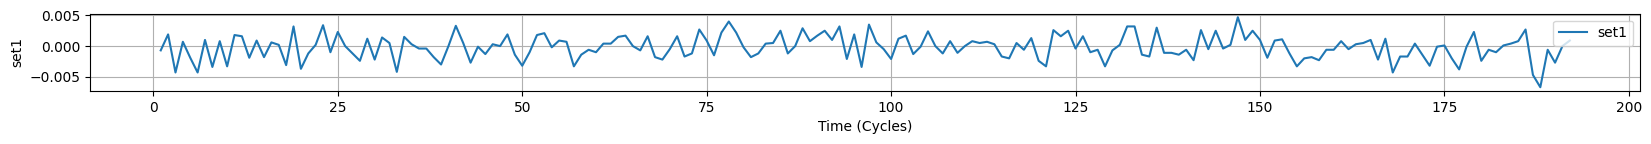

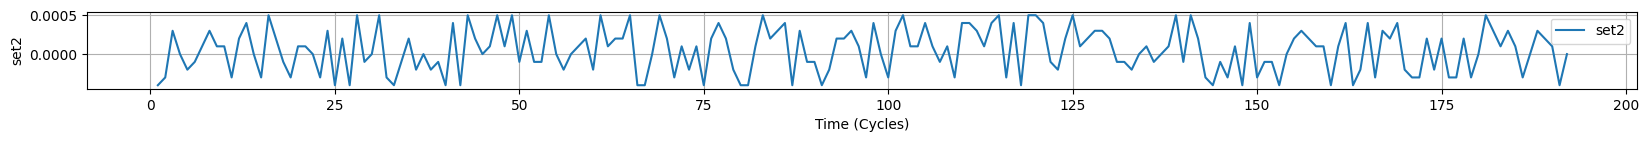

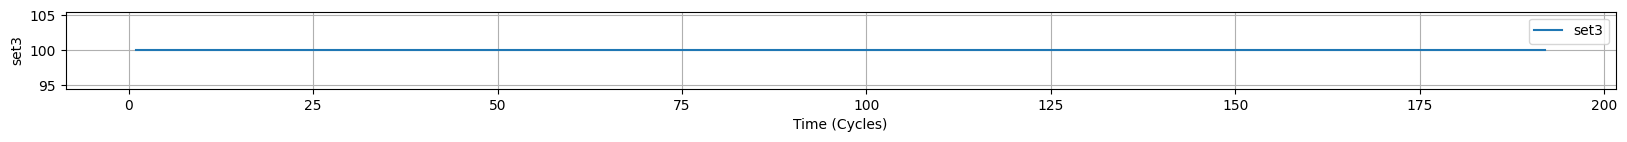

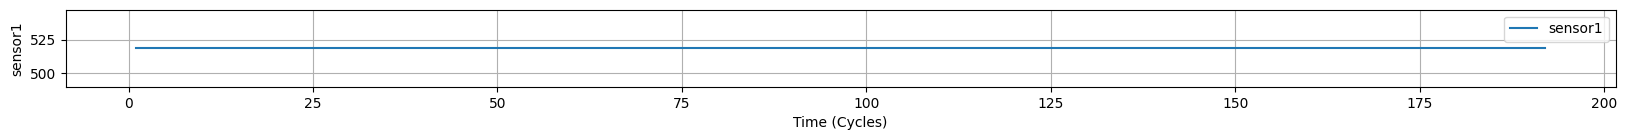

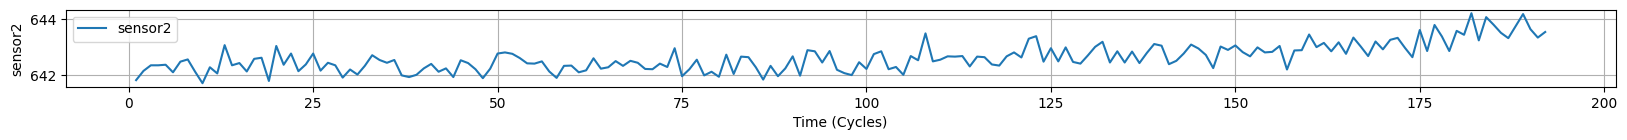

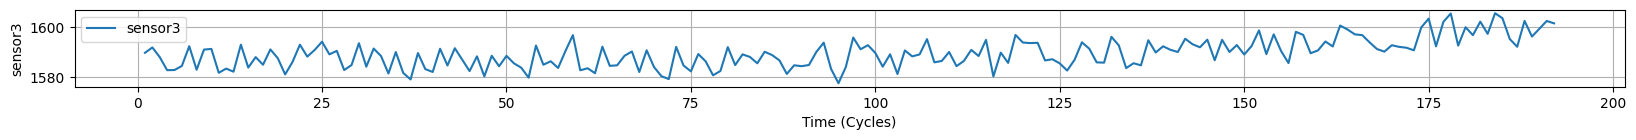

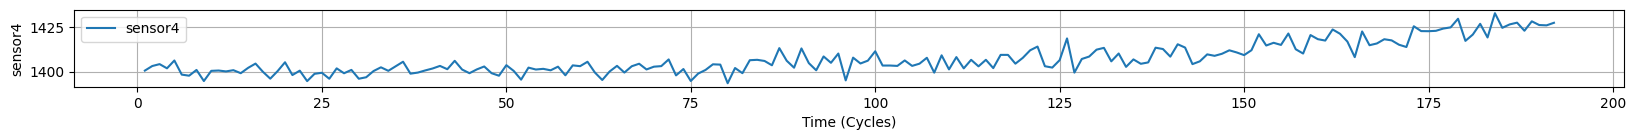

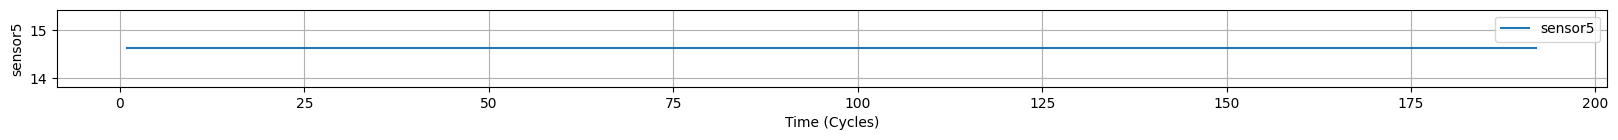

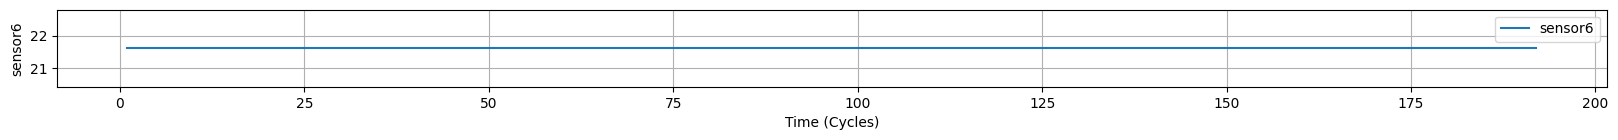

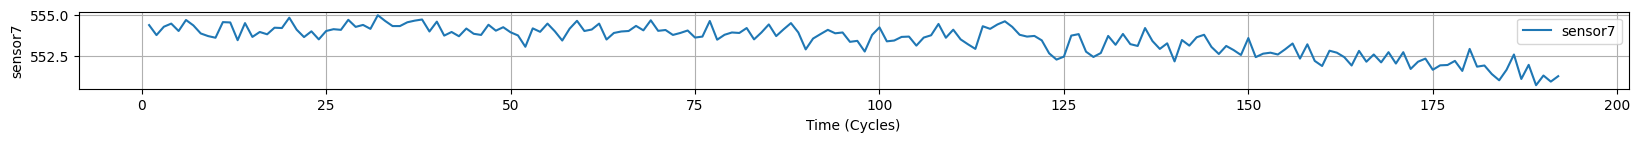

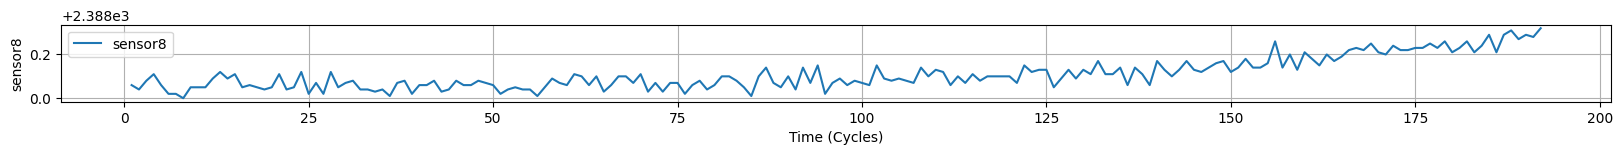

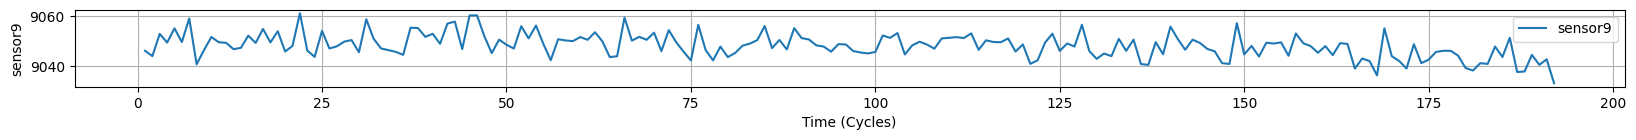

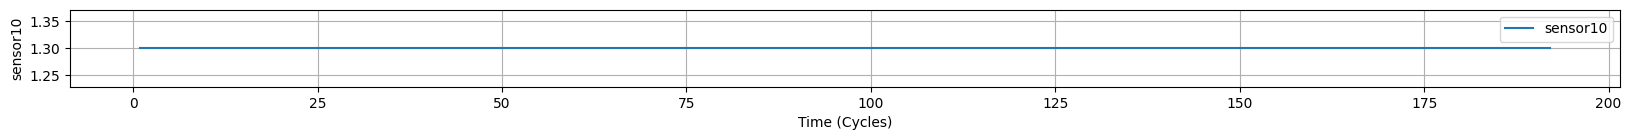

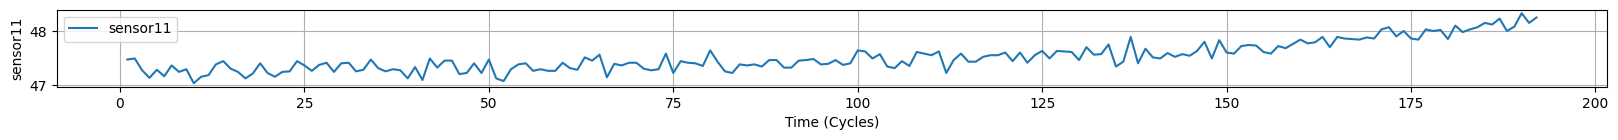

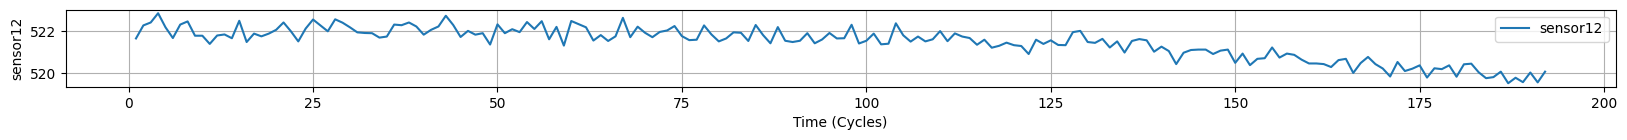

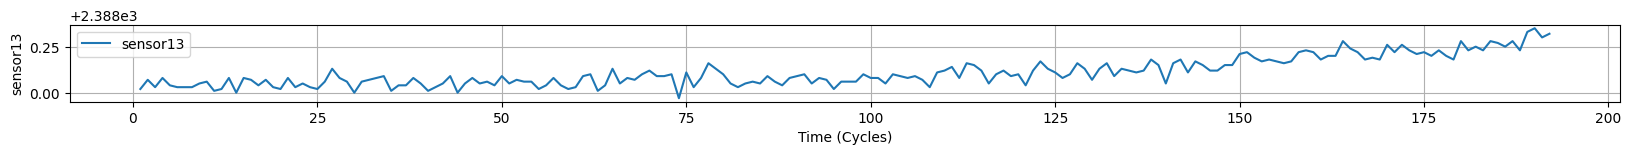

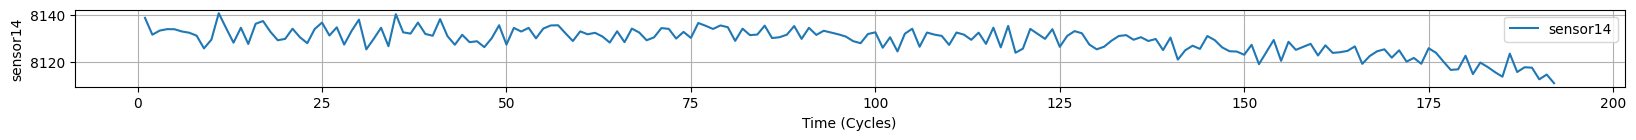

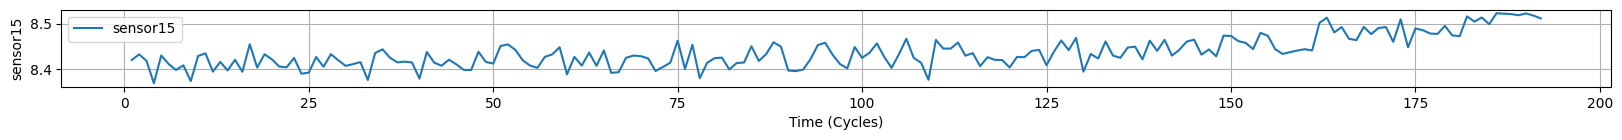

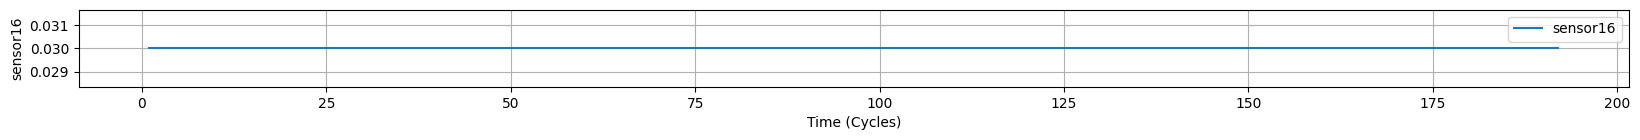

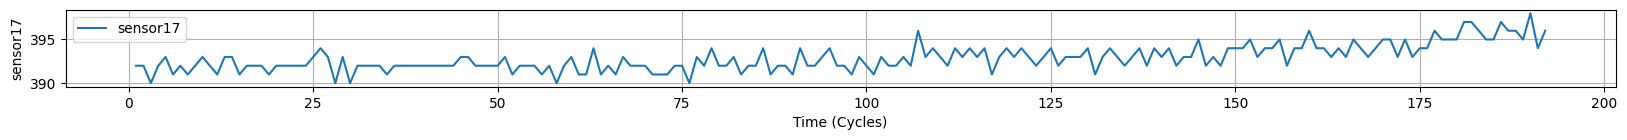

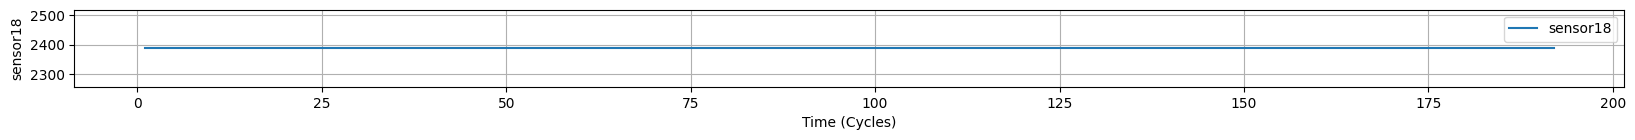

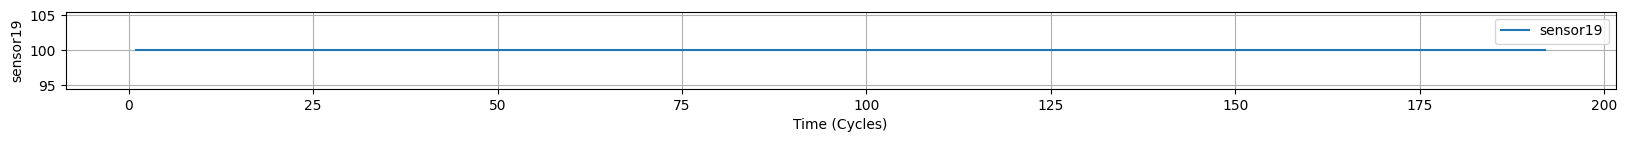

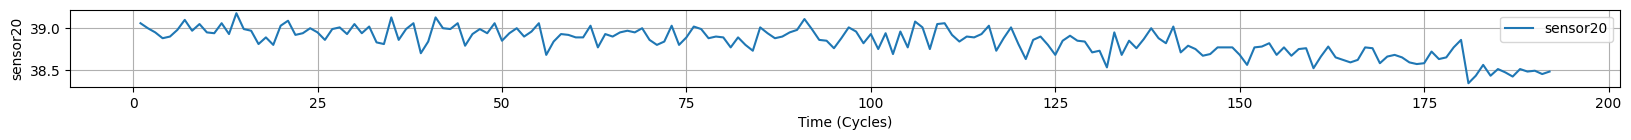

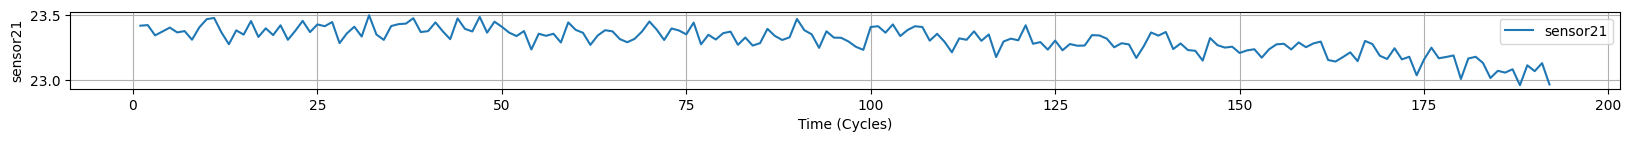

In [22]:
for col in [sensor for sensor in df.columns if 'set' in sensor or 'sensor' in sensor]:
    plot_graph(df[df['id'] == 1], col)

In [23]:
#check the distrebution
def dis_graph(df, col):
    sns.displot(df, x = col, kde = True, height= 5, aspect=1, bins = 40)

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


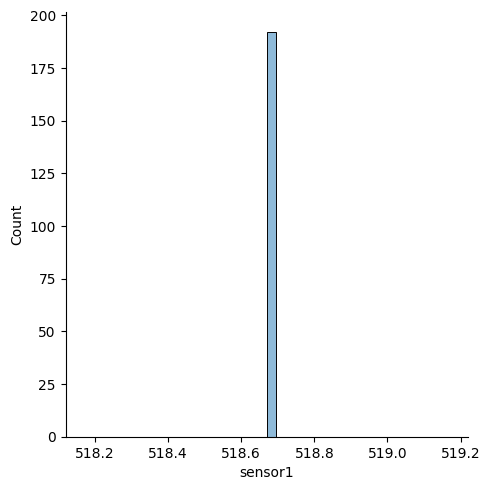

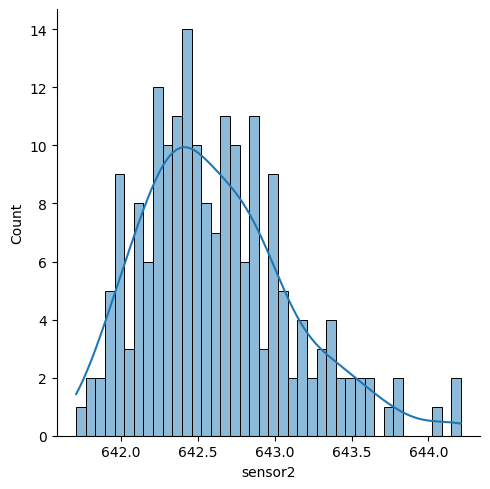

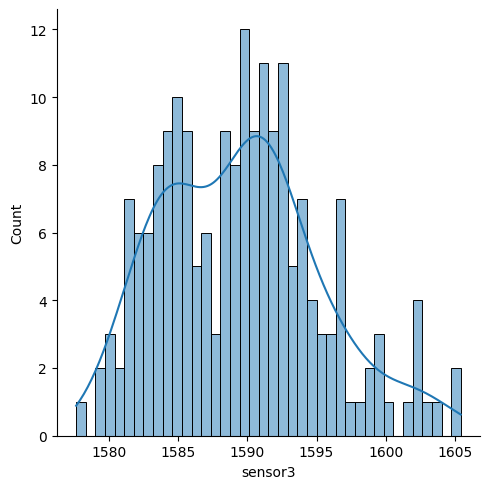

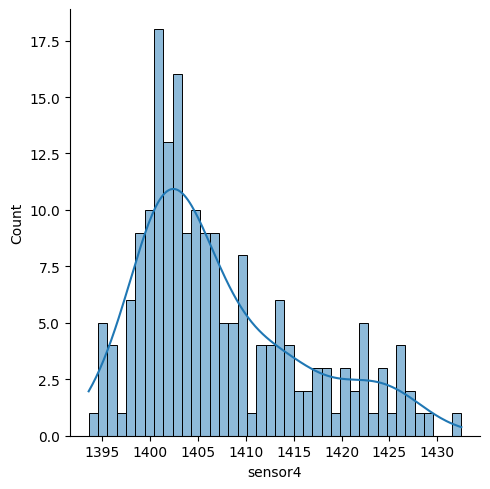

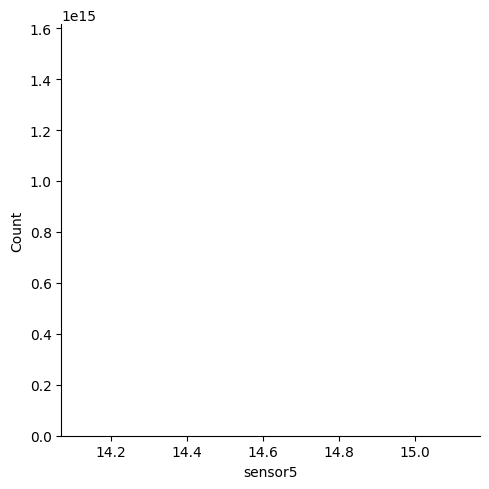

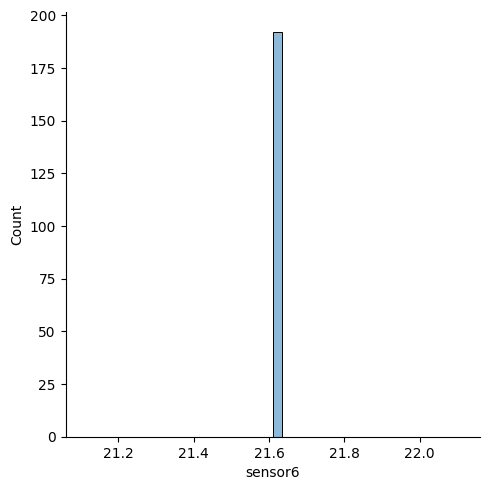

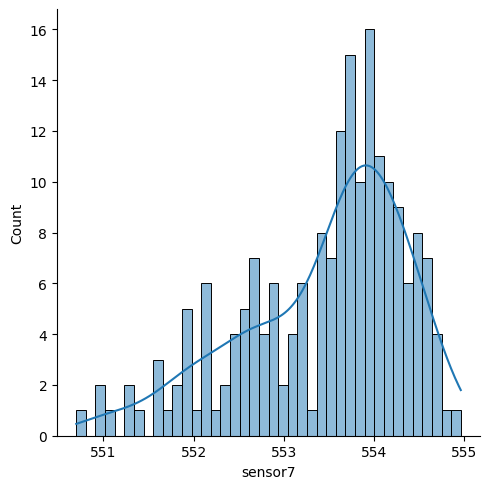

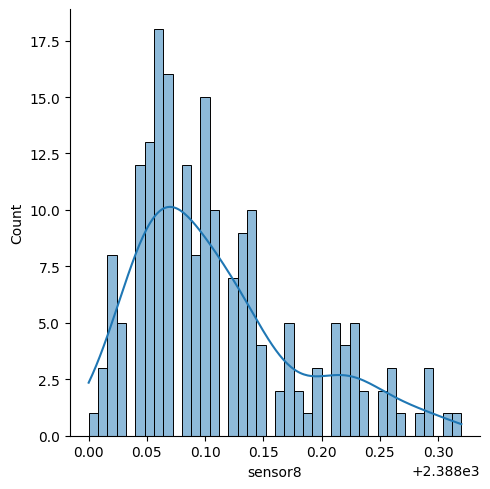

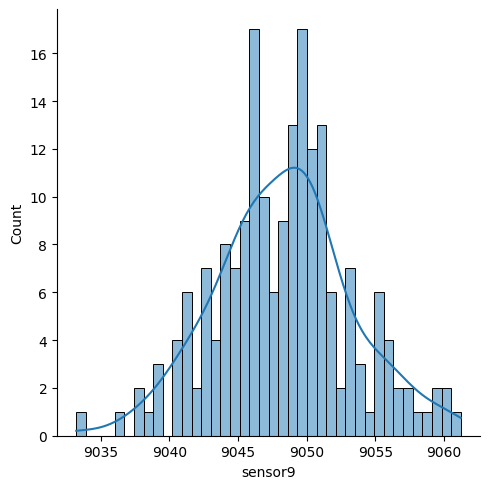

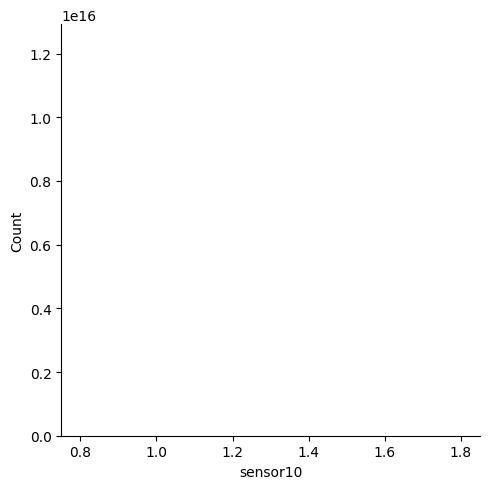

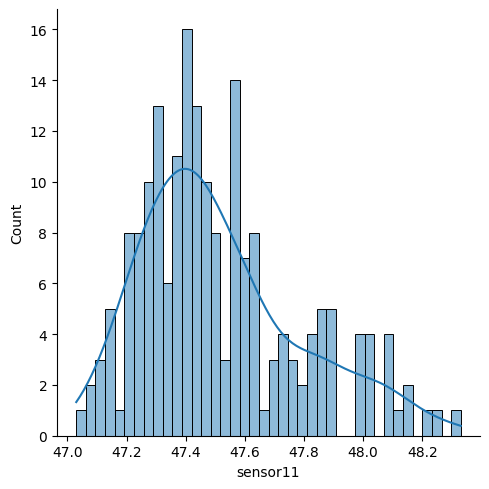

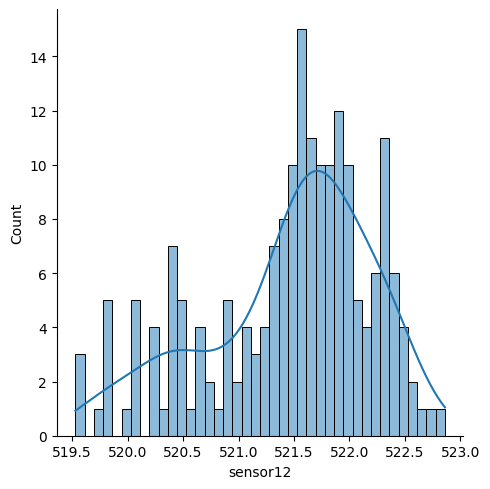

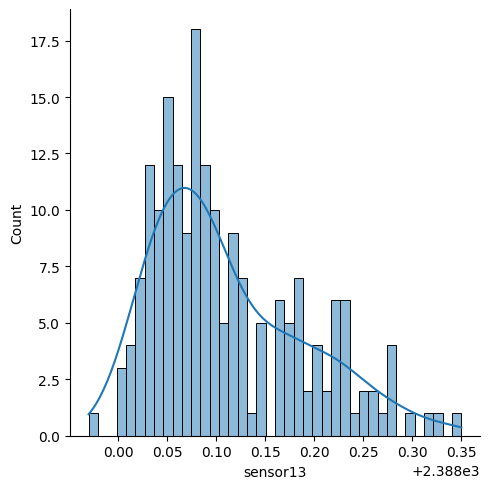

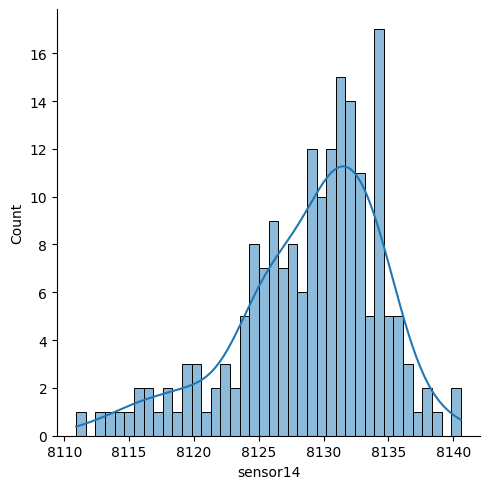

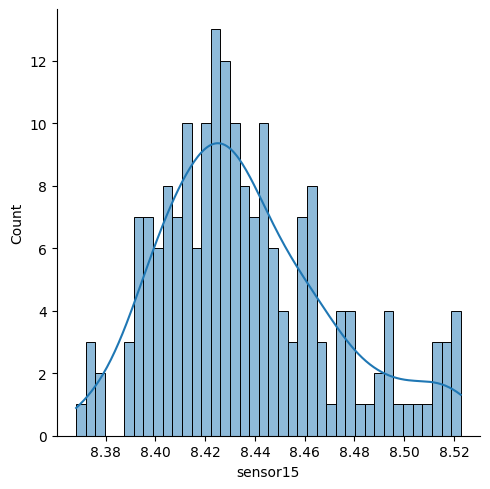

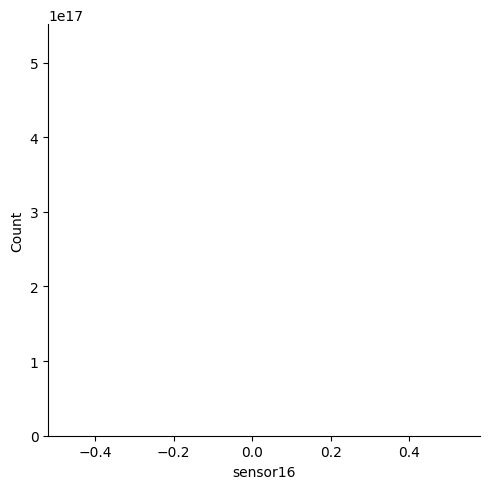

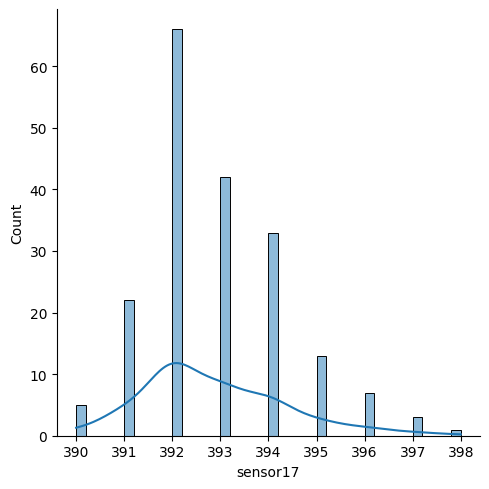

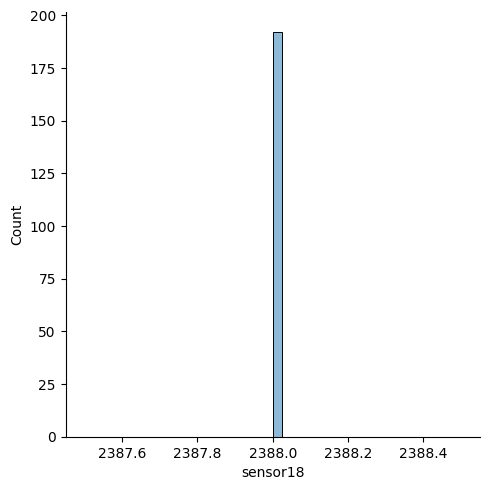

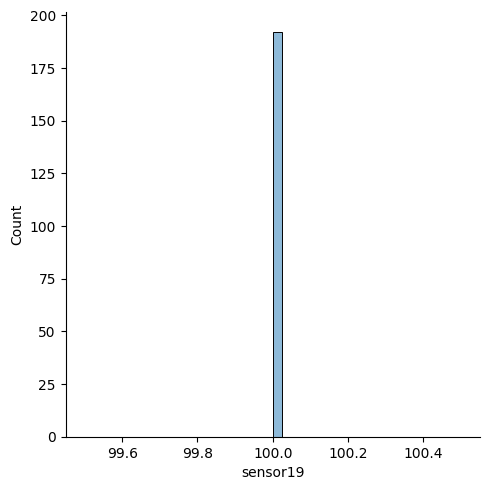

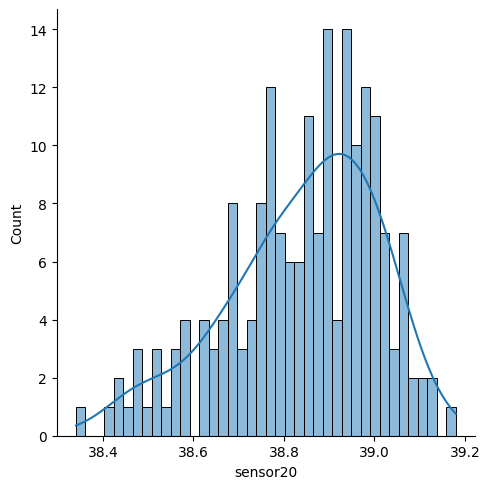

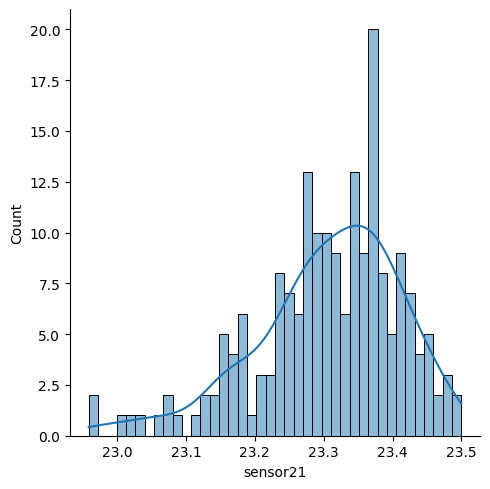

In [24]:
for col in [sensor for sensor in df.columns if 'sensor' in sensor]:
    dis_graph(df[df['id'] == 1], col)

In [25]:
# perform transfromation

<Axes: ylabel='id'>

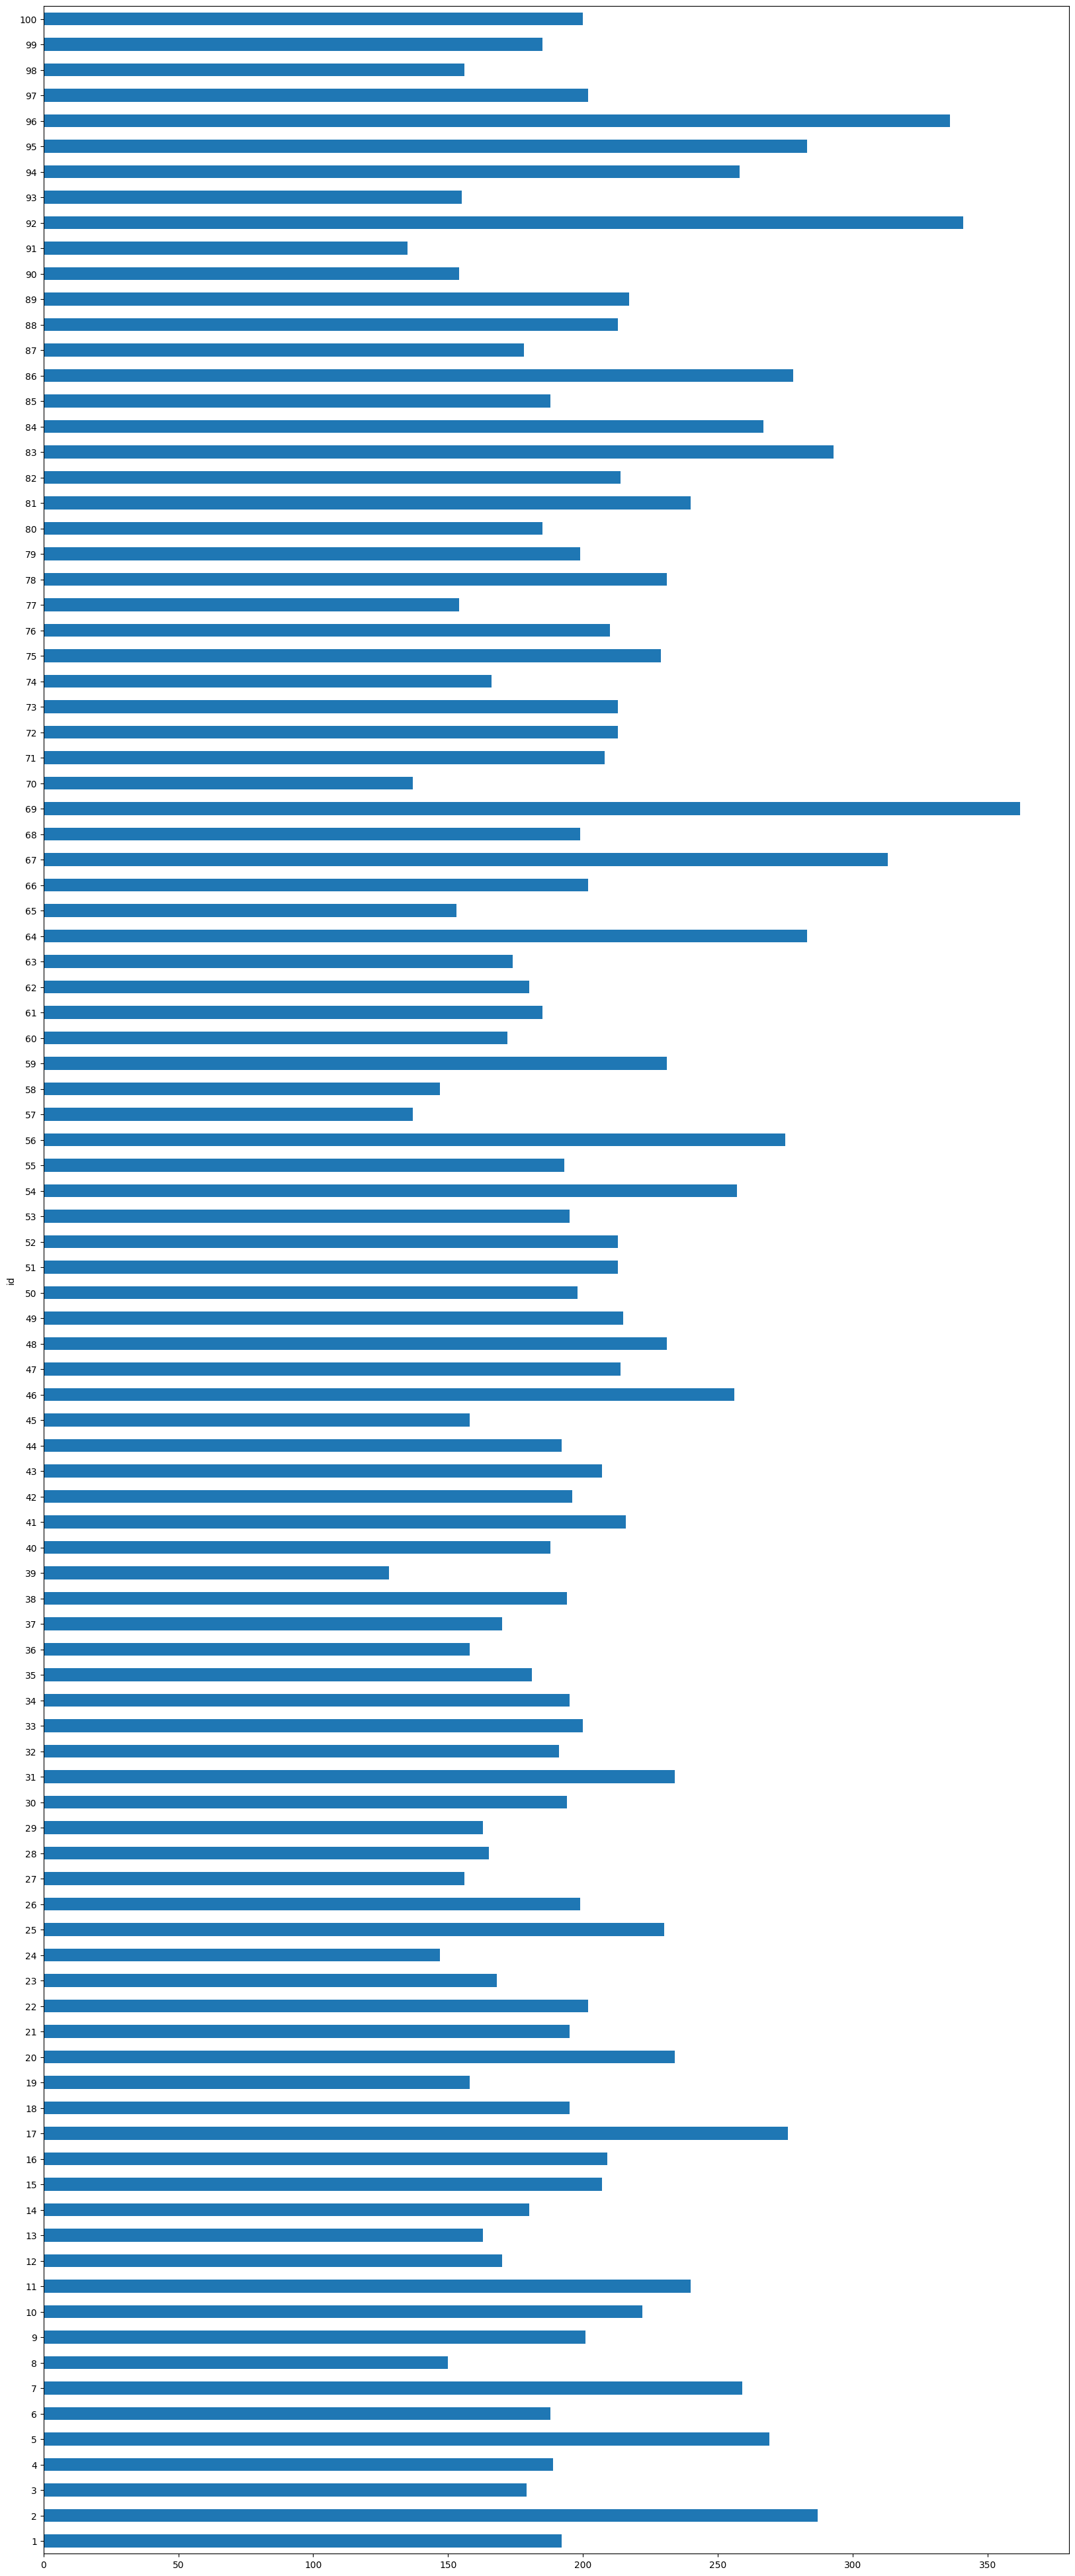

In [26]:
# grap of time vs id
plt.figure(figsize=(20,50))
df[['id', 'time']].groupby(['id']).max()['time'].plot(kind = 'barh', stacked=True, width = 0.5)

# make the RUL for df

In [25]:
time_max = df.groupby('id')['time'].max().reset_index()

In [26]:
time_max.rename(columns={"time": "max_cycle"}, inplace=True)
time_max

,id,max_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [27]:
df = df.merge(time_max, on="id", how="left")
df.head()

,id,time,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,max_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192


In [28]:
df['rul'] = df['max_cycle'] - df.time

In [29]:
df.drop('max_cycle', axis = 1, inplace = True)
df.head()

,id,time,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [31]:
df.shape

(20631, 27)

In [32]:
# remove sensor that are not change with time
remove = [19, 18, 16, 10, 5, 1] 
len(remove)

6

In [33]:
df1 = df.drop(['set3'] + ['sensor' + str(i) for i in remove],axis = 1)
test_df = test_df.drop(['set3'] + ['sensor' + str(i) for i in remove],axis = 1)

In [34]:
df1.shape, df.shape, test_df.shape, RUL.shape

((20631, 20), (20631, 27), (100, 19), (100, 1))

In [36]:
df1.columns, test_df.columns

(Index(['id', 'time', 'set1', 'set2', 'sensor2', 'sensor3', 'sensor4',
        'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
        'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
        'rul'],
       dtype='object'),
 Index(['id', 'time', 'set1', 'set2', 'sensor2', 'sensor3', 'sensor4',
        'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
        'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21'],
       dtype='object'))

In [38]:
df1[df1.rul == 8]

,id,time,set1,set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,rul
183,1,184,0.0004,0.0003,644.07,1605.44,1432.52,21.61,551.00,2388.24,9047.91,48.07,519.77,2388.28,8115.61,8.5133,395,38.43,23.0146,8
470,2,279,0.0006,0.0005,643.64,1594.80,1426.95,21.61,551.16,2388.19,9096.60,48.13,519.66,2388.26,8164.77,8.5237,395,38.51,23.0460,8
649,3,171,-0.0011,-0.0003,643.36,1603.48,1419.33,21.61,551.57,2388.16,9170.51,47.91,520.75,2388.15,8233.24,8.5011,395,38.70,23.1225,8
838,4,181,0.0004,-0.0002,643.34,1597.16,1413.99,21.61,551.82,2388.11,9168.97,47.95,520.24,2388.16,8230.94,8.4821,396,38.57,23.1169,8
1107,5,261,0.0014,0.0005,643.27,1600.60,1421.13,21.61,552.07,2388.16,9133.37,48.13,520.63,2388.14,8201.38,8.4950,396,38.52,23.1152,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19879,96,328,-0.0001,0.0005,643.62,1598.42,1430.42,21.61,550.82,2388.22,9069.87,48.03,519.14,2388.28,8136.92,8.5124,397,38.38,23.1484,8
20081,97,194,-0.0030,0.0001,643.35,1607.58,1420.27,21.61,552.42,2388.10,9178.98,47.85,520.78,2388.17,8240.75,8.4759,395,38.53,23.1768,8
20237,98,148,0.0002,-0.0005,643.35,1606.24,1427.64,21.61,551.48,2388.22,9060.29,48.00,519.87,2388.23,8128.91,8.5171,395,38.55,23.1058,8
20422,99,177,-0.0023,0.0003,643.69,1592.46,1429.64,21.61,551.83,2388.25,9055.10,48.04,520.04,2388.21,8133.64,8.4787,397,38.63,23.1627,8


In [37]:
# plot the graph that shows the effect on the rlu by sensors

In [38]:
def plot(df, sensor):
    plt.figure(figsize=(10,2))
    for i in range(1, 11):
        plt.plot('rul', sensor, data = df[df.id == i].rolling(10).mean())
    plt.xlabel("RUL")
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(sensor)
    plt.show()
    plt.close()

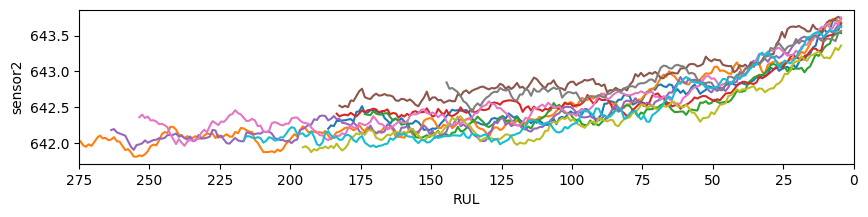

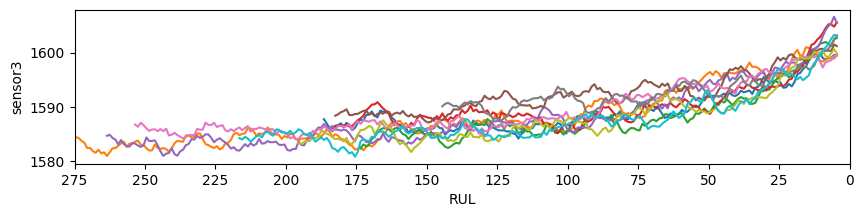

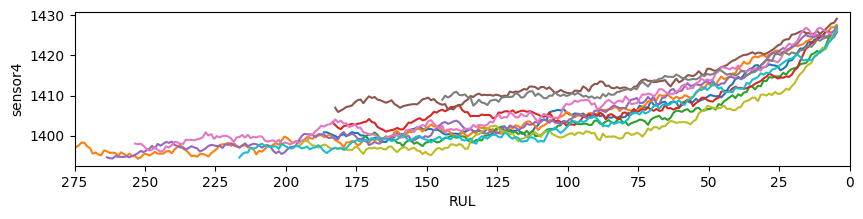

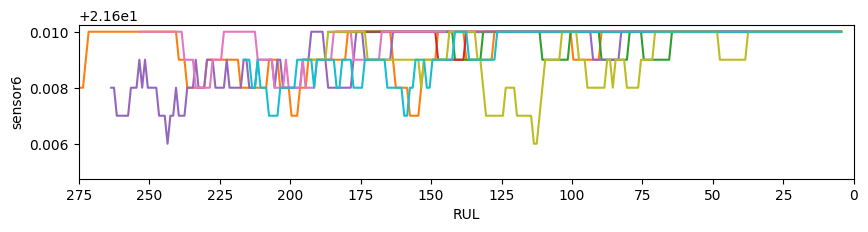

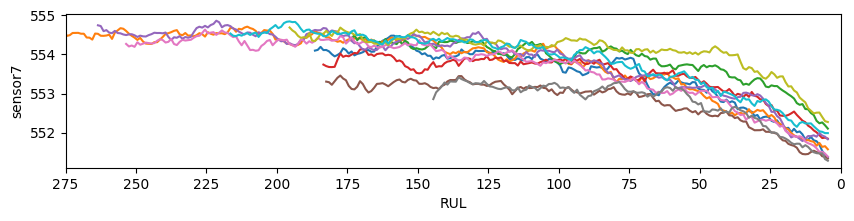

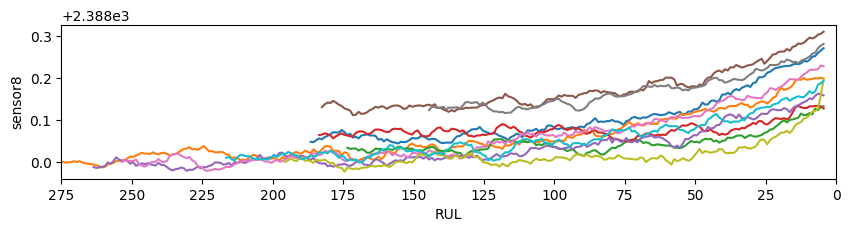

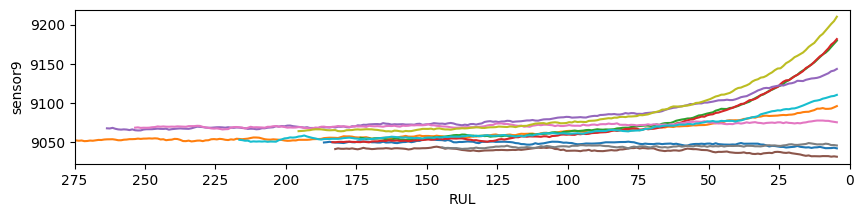

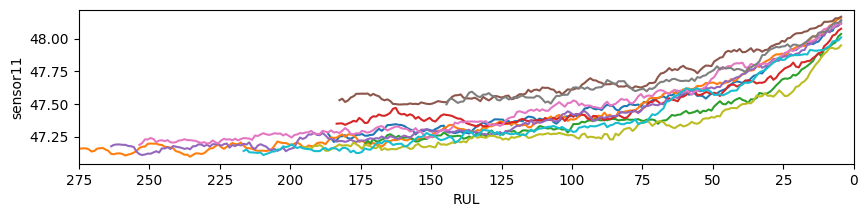

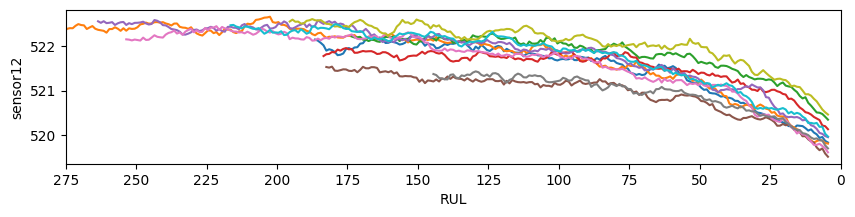

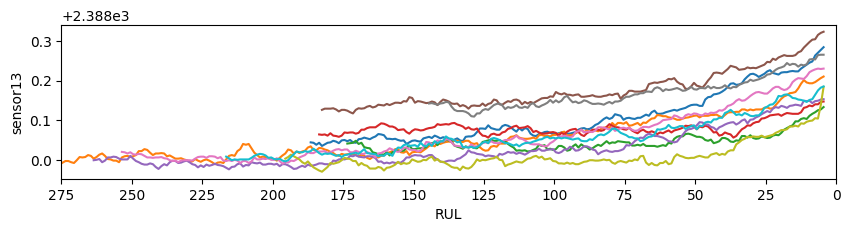

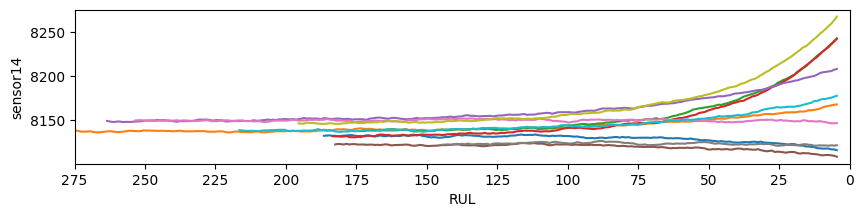

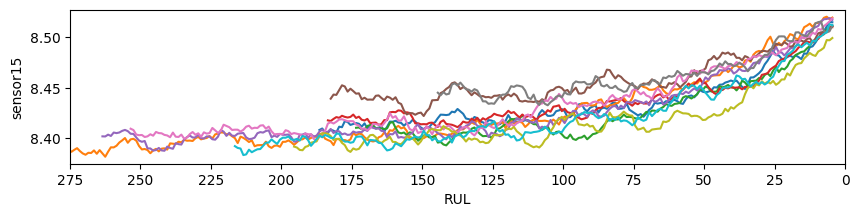

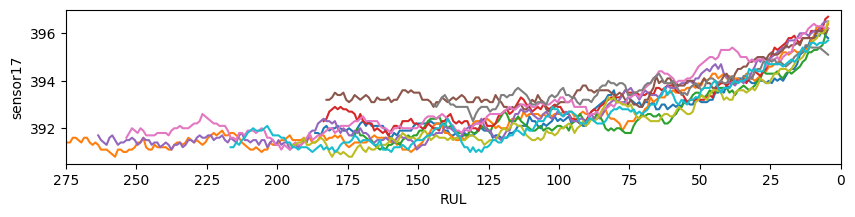

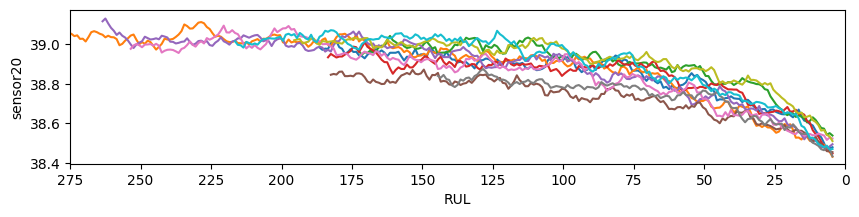

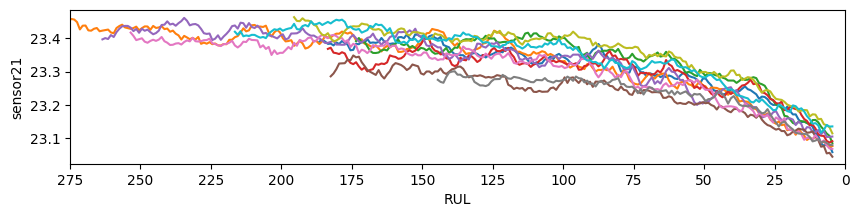

In [39]:
for col in [sensor for sensor in df1.columns if 'sensor' in sensor]:
    plot(df1, col)

# transform into train test 

In [40]:
X = df1.drop('rul', axis = 1)
y = df1.rul
RUL = RUL.iloc[:, -1]

In [41]:
X, y

(        id  time    set1    set2  sensor2  sensor3  sensor4  sensor6  sensor7  \
 0        1     1 -0.0007 -0.0004   641.82  1589.70  1400.60    21.61   554.36   
 1        1     2  0.0019 -0.0003   642.15  1591.82  1403.14    21.61   553.75   
 2        1     3 -0.0043  0.0003   642.35  1587.99  1404.20    21.61   554.26   
 3        1     4  0.0007  0.0000   642.35  1582.79  1401.87    21.61   554.45   
 4        1     5 -0.0019 -0.0002   642.37  1582.85  1406.22    21.61   554.00   
 ...    ...   ...     ...     ...      ...      ...      ...      ...      ...   
 20626  100   196 -0.0004 -0.0003   643.49  1597.98  1428.63    21.61   551.43   
 20627  100   197 -0.0016 -0.0005   643.54  1604.50  1433.58    21.61   550.86   
 20628  100   198  0.0004  0.0000   643.42  1602.46  1428.18    21.61   550.94   
 20629  100   199 -0.0011  0.0003   643.23  1605.26  1426.53    21.61   550.68   
 20630  100   200 -0.0032 -0.0005   643.85  1600.38  1432.14    21.61   550.79   
 
        sensor

In [42]:
RUL

0     112
1      98
2      69
3      82
4      91
     ... 
95    137
96     82
97     59
98    117
99     20
Name: RUL, Length: 100, dtype: int64

# Now scaled the data

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [44]:
X_train.shape, X_val.shape,test_df.shape

((16504, 19), (4127, 19), (100, 19))

In [45]:
y_train.shape, y_val.shape, RUL.shape

((16504,), (4127,), (100,))

In [46]:
df1.columns, len(df1.columns)

(Index(['id', 'time', 'set1', 'set2', 'sensor2', 'sensor3', 'sensor4',
        'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
        'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
        'rul'],
       dtype='object'),
 20)

In [47]:
col = ['set1', 'set2', 'sensor2', 'sensor3', 'sensor4',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
       'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21']

In [48]:
len(col)

17

In [49]:
scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train[col])
X_val_scale = scale.transform(X_val[col]) # this is for LSTM only
X_test = scale.transform(test_df[col])

In [50]:
X_train_scale.shape

(16504, 17)

In [51]:
X_train_scale

array([[0.47701149, 0.41666667, 0.44879518, ..., 0.25      , 0.5503876 ,
        0.59568546],
       [0.44827586, 0.58333333, 0.41566265, ..., 0.5       , 0.47286822,
        0.44050104],
       [0.53448276, 0.75      , 0.51807229, ..., 0.5       , 0.31007752,
        0.51176061],
       ...,
       [0.53448276, 0.33333333, 0.44578313, ..., 0.41666667, 0.4496124 ,
        0.63187196],
       [0.18965517, 1.        , 0.46987952, ..., 0.41666667, 0.46511628,
        0.61002088],
       [0.31609195, 0.58333333, 0.44879518, ..., 0.41666667, 0.56589147,
        0.58830898]])

In [52]:
X_test

array([[0.46551724, 0.83333333, 0.4126506 , ..., 0.41666667, 0.51937984,
        0.64161447],
       [0.60344828, 0.41666667, 0.40361446, ..., 0.25      , 0.51937984,
        0.51162143],
       [0.40804598, 0.83333333, 0.50301205, ..., 0.58333333, 0.6124031 ,
        0.52860125],
       ...,
       [0.59770115, 0.58333333, 0.44277108, ..., 0.5       , 0.48062016,
        0.64940849],
       [0.77011494, 0.5       , 0.23795181, ..., 0.25      , 0.62790698,
        0.64759916],
       [0.57471264, 0.75      , 0.52409639, ..., 0.66666667, 0.43410853,
        0.40542797]])

In [53]:
X_test.shape

(100, 17)

# make models 

In [67]:
# 1 logistic
# 2 rf
# 3 Xgboost

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [224]:
def evaluation(y_test, y_pred):
    print(y_test.shape, y_pred.shape)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-2 Score: {r2:.4f}")


In [76]:
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

LinearRegression()

In [80]:
y_lr = lr.predict(X_test)
evaluation(RUL, y_lr)

Mean Squared Error: 1012.7934
Mean Absolute Error: 25.4544
Root Mean Squared Error: 31.8244
R-2 Score: 0.4135


In [81]:
xg = XGBRegressor()
xg.fit(X_train_scale, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
y_xg = xg.predict(X_test)

In [84]:
evaluation(RUL, y_xg)

Mean Squared Error: 1275.8622
Mean Absolute Error: 25.6003
Root Mean Squared Error: 35.7192
R-2 Score: 0.2612


In [85]:
rf = RandomForestRegressor()
rf.fit(X_train_scale, y_train)

RandomForestRegressor()

In [86]:
y_rf = rf.predict(X_test)

In [87]:
evaluation(RUL, y_rf)

Mean Squared Error: 1104.9140
Mean Absolute Error: 24.4262
Root Mean Squared Error: 33.2402
R-2 Score: 0.3602


In [299]:
def plot_boundary(y_test, y_predictions):
    sns.scatterplot(x=y_test, y=y_predictions, s=100, alpha=0.6, linewidth=1, edgecolor='black')
    sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], linewidth=4, color='gray')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()


    index = np.arange(len(y_test))
    plt.figure(figsize=(10,5))
    plt.bar(index, y_predictions, color = 'g', label = 'predicted value', width=1, edgecolor = 'black', align = 'center')
    plt.bar(index, y_test, label = 'True Value', width = 0.5, color = 'r',align = 'center')
    plt.legend()
    plt.show()

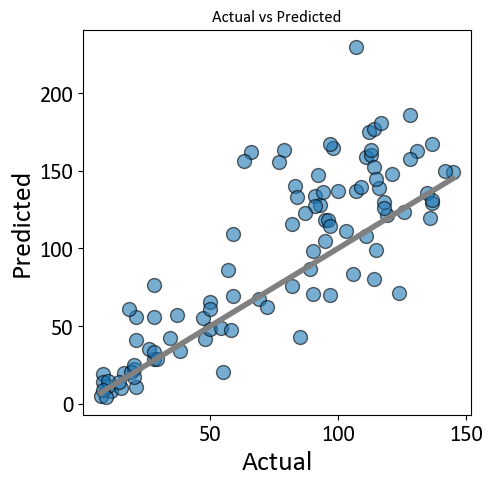

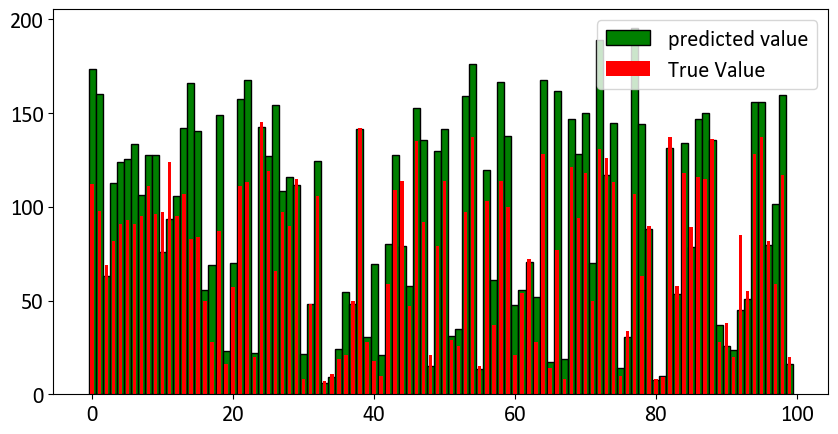

In [214]:
plot_boundary(RUL, y_xg)

In [169]:
# lstm without 

In [64]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [65]:
#reshape the arrays

In [54]:
X_train_reshape = X_train_scale.reshape(X_train_scale.shape[0], 1, X_train_scale.shape[1])

In [ ]:
X_val_reshape = X_val_scale.reshape(X_val_scale.shape[0], 1, X_val_scale.shape[1])
X_test_reshape = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
X_train_scale[0], X_train_reshape[0]

In [ ]:
X_train_reshape.shape, X_val_reshape.shape, X_test_reshape.shape

#### clip the y_train value

In [ ]:
plt.hist(y_train)
plt.show()

In [250]:
y_train_clip = y_train.clip(upper=195)
y_val_clip = y_val.clip(upper=195)

In [251]:
y_train_clip.unique().max()

195

In [253]:
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape = (1, X_train_scale.shape[1])))
model.add(BatchNormalization())
model.add(LSTM(10, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [264]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 1, 20)               │           3,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 1, 20)               │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 10)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,217 (28.19 KB)

 Trainable params: 7,157 (27.96 KB)

 Non-trainable params: 60 (240.00 B)

In [265]:
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

In [266]:
model.fit(X_train_reshape, y_train, epochs=10, batch_size=64, validation_data=(X_val_reshape, y_val))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 12649.6602 - mse: 12649.6602 - val_loss: 4028.9795 - val_mse: 4028.9795
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2944.8669 - mse: 2944.8669 - val_loss: 2616.1055 - val_mse: 2616.1055
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2587.6086 - mse: 2587.6086 - val_loss: 1939.4298 - val_mse: 1939.4298
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2339.1138 - mse: 2339.1138 - val_loss: 2141.1465 - val_mse: 2141.1465
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2228.0649 - mse: 2228.0649 - val_loss: 2281.6121 - val_mse: 2281.6121
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2123.3066 - mse: 2123.3066 - val_loss: 2022.9730 - val_mse: 2022.9730
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2041.1528 - mse: 2041.1528 - val_loss: 2255.3557 - val_mse: 2255.3557
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1906.6449 - mse: 19

In [267]:
y_model = model.predict(X_test_reshape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step


In [268]:
evaluation(RUL, y_model)

(100,) (100, 1)
Mean Squared Error: 429.8132
Mean Absolute Error: 15.6394
Root Mean Squared Error: 20.7319
R-2 Score: 0.7511


In [244]:
evaluation(RUL, y_model)

(100,) (100, 1)
Mean Squared Error: 408.3182
Mean Absolute Error: 14.5652
Root Mean Squared Error: 20.2069
R-2 Score: 0.7636


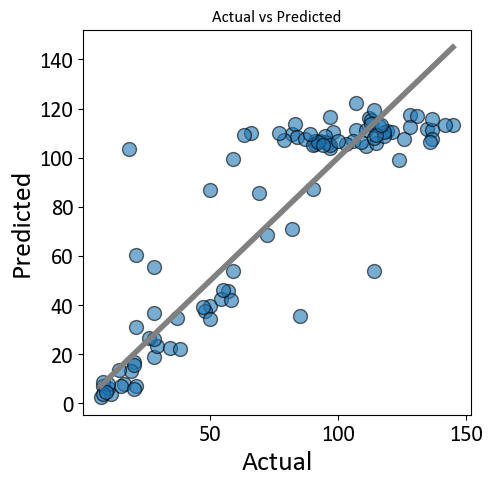

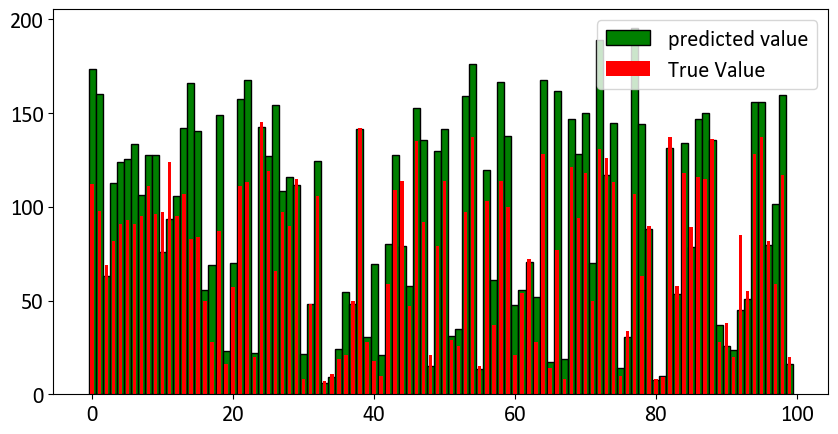

In [245]:
plot_boundary(RUL, y_model.reshape(100))

# Add some Extra Feature

### make befor it apply

In [214]:
df1.shape

(20631, 20)

In [215]:
tem = df1.copy()

In [216]:
tem.shape

(20631, 20)

In [217]:
tem.head()

,id,time,set1,set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,rul
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [148]:
tem['sensor8_ma'] =  df.groupby('id')['sensor8'].rolling(10).mean().reset_index(0, drop = True)

In [149]:
tem.loc[:10, 'sensor8_ma']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     2388.049
10    2388.048
Name: sensor8_ma, dtype: float64

In [196]:
# Apply the operation for each group separately
for unit_id, group in tem.groupby("id"):
    tem.loc[group.index[:10], "sensor8_ma"] = tem.loc[group.index[:10], "sensor8"]

In [197]:
tem.loc[:10, 'sensor8_ma']

0     2388.06
1     2388.04
2     2388.08
3     2388.11
4     2388.06
5     2388.02
6     2388.02
7     2388.00
8     2388.05
9     2388.05
10    2388.05
Name: sensor8_ma, dtype: float64

In [198]:
tem.sensor8_ma

0        2388.060
1        2388.040
2        2388.080
3        2388.110
4        2388.060
           ...   
20626    2388.224
20627    2388.225
20628    2388.223
20629    2388.230
20630    2388.235
Name: sensor8_ma, Length: 20631, dtype: float64

In [180]:
# cal the rate of change
tem['rat8'] = tem.groupby("id")['sensor8'].diff()
tem['rat8'] = tem['rat8'].fillna(0)

In [181]:
# cal the exponetal moving everage
tem['sensor8_ema'] = tem.groupby("id")['sensor8'].ewm(alpha = 0.6).mean().reset_index(0, drop=True)

In [199]:
tem.isnull().sum()

id             0
time           0
set1           0
set2           0
sensor2        0
sensor3        0
sensor4        0
sensor6        0
sensor7        0
sensor8        0
sensor9        0
sensor11       0
sensor12       0
sensor13       0
sensor14       0
sensor15       0
sensor17       0
sensor20       0
sensor21       0
rul            0
sensor8_ma     0
rat8           0
sensor8_ema    0
dtype: int64

In [200]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression

# Feature Set
features = ["sensor8_ema", "rat8", "sensor8_ma"]  # Replace with actual feature names
X_selected = tem[features]
y = tem["rul"]  # Target variable

# Mutual Information Score
mi_scores = mutual_info_regression(X_selected, y)
feature_importance = dict(zip(features, mi_scores))

print("Feature Importance (Mutual Information):", feature_importance)


Feature Importance (Mutual Information): {'sensor8_ema': 0.3256290225223726, 'rat8': 0.0055347203869100525, 'sensor8_ma': 0.42608196994604786}


## Apply to df

In [21]:
df2 = df1.copy()

NameError: name 'df1' is not defined

In [40]:
df2.shape

(20631, 20)

In [41]:
def feature_creation(data, sensor):
    # Moving Average
    data[sensor + '_ma'] = data.groupby('id')[sensor].rolling(10).mean().reset_index(0, drop = True)
    for unit_id, group in data.groupby("id"):
        data.loc[group.index[:10], sensor + '_ma'] = data.loc[group.index[:10], sensor]

    # exponetial moving average
    data[sensor + "_ema"] = data.groupby("id")[sensor].ewm(alpha = 0.6).mean().reset_index(0, drop=True)

In [42]:
for col in (word for word in df2.columns  if 'sensor' in word):
    feature_creation(df2, col)

In [43]:
df2.shape

(20631, 50)

In [44]:
df2.isnull().sum()

id              0
time            0
set1            0
set2            0
sensor2         0
sensor3         0
sensor4         0
sensor6         0
sensor7         0
sensor8         0
sensor9         0
sensor11        0
sensor12        0
sensor13        0
sensor14        0
sensor15        0
sensor17        0
sensor20        0
sensor21        0
rul             0
sensor2_ma      0
sensor2_ema     0
sensor3_ma      0
sensor3_ema     0
sensor4_ma      0
sensor4_ema     0
sensor6_ma      0
sensor6_ema     0
sensor7_ma      0
sensor7_ema     0
sensor8_ma      0
sensor8_ema     0
sensor9_ma      0
sensor9_ema     0
sensor11_ma     0
sensor11_ema    0
sensor12_ma     0
sensor12_ema    0
sensor13_ma     0
sensor13_ema    0
sensor14_ma     0
sensor14_ema    0
sensor15_ma     0
sensor15_ema    0
sensor17_ma     0
sensor17_ema    0
sensor20_ma     0
sensor20_ema    0
sensor21_ma     0
sensor21_ema    0
dtype: int64

In [45]:
df2.head()

,id,time,set1,set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,...,sensor14_ma,sensor14_ema,sensor15_ma,sensor15_ema,sensor17_ma,sensor17_ema,sensor20_ma,sensor20_ema,sensor21_ma,sensor21_ema
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,8138.62,8138.620000,8.4195,8.419500,392.0,392.000000,39.06,39.060000,23.4190,23.419000
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,8131.49,8133.527143,8.4318,8.428286,392.0,392.000000,39.00,39.017143,23.4236,23.422286
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,8133.23,8133.336667,8.4178,8.421564,390.0,390.717949,38.95,38.974103,23.3442,23.372231
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,8133.83,8133.640443,8.3682,8.388704,392.0,391.507389,38.88,38.916158,23.3739,23.373259
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,8133.80,8133.737168,8.4294,8.413374,393.0,392.412221,38.90,38.906363,23.4044,23.392137


In [46]:
# make for test_df

In [47]:
for col in (word for word in test_df.columns  if 'sensor' in word):
    feature_creation(test_df, col)

In [48]:
test_df.head()

,id,time,set1,set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,...,sensor14_ma,sensor14_ema,sensor15_ma,sensor15_ema,sensor17_ma,sensor17_ema,sensor20_ma,sensor20_ema,sensor21_ma,sensor21_ema
30,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,...,8130.11,8130.11,8.4024,8.4024,393.0,393.0,38.81,38.81,23.3552,23.3552
79,2,49,0.0018,-0.0001,642.55,1586.59,1410.83,21.61,553.52,2388.10,...,8126.90,8126.90,8.4505,8.4505,391.0,391.0,38.81,38.81,23.2618,23.2618
205,3,126,-0.0016,0.0004,642.88,1589.75,1418.89,21.61,552.59,2388.16,...,8131.46,8131.46,8.4119,8.4119,395.0,395.0,38.93,38.93,23.2740,23.2740
311,4,106,0.0012,0.0004,642.78,1594.53,1406.88,21.61,552.64,2388.13,...,8133.64,8133.64,8.4634,8.4634,395.0,395.0,38.58,38.58,23.2581,23.2581
409,5,98,-0.0013,-0.0004,642.27,1589.94,1419.36,21.61,553.29,2388.10,...,8125.74,8125.74,8.4362,8.4362,394.0,394.0,38.75,38.75,23.4117,23.4117


In [49]:
test_df.isnull().sum()

id              0
time            0
set1            0
set2            0
sensor2         0
sensor3         0
sensor4         0
sensor6         0
sensor7         0
sensor8         0
sensor9         0
sensor11        0
sensor12        0
sensor13        0
sensor14        0
sensor15        0
sensor17        0
sensor20        0
sensor21        0
sensor2_ma      0
sensor2_ema     0
sensor3_ma      0
sensor3_ema     0
sensor4_ma      0
sensor4_ema     0
sensor6_ma      0
sensor6_ema     0
sensor7_ma      0
sensor7_ema     0
sensor8_ma      0
sensor8_ema     0
sensor9_ma      0
sensor9_ema     0
sensor11_ma     0
sensor11_ema    0
sensor12_ma     0
sensor12_ema    0
sensor13_ma     0
sensor13_ema    0
sensor14_ma     0
sensor14_ema    0
sensor15_ma     0
sensor15_ema    0
sensor17_ma     0
sensor17_ema    0
sensor20_ma     0
sensor20_ema    0
sensor21_ma     0
sensor21_ema    0
dtype: int64

# Make scaling and spliting

In [256]:
X = df2.drop('rul', axis = 1)
y = df2.rul

In [257]:
X.shape

(20631, 49)

In [258]:
y.shape

(20631,)

In [259]:
RUL

0     112
1      98
2      69
3      82
4      91
     ... 
95    137
96     82
97     59
98    117
99     20
Name: RUL, Length: 100, dtype: int64

In [260]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [270]:
X_train.shape, X_val.shape, test_df.shape

((16504, 49), (4127, 49), (100, 49))

In [271]:
y_train.shape, y_val.shape, RUL.shape

((16504,), (4127,), (100,))

In [273]:
X.columns

Index(['id', 'time', 'set1', 'set2', 'sensor2', 'sensor3', 'sensor4',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
       'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
       'sensor2_ma', 'sensor2_ema', 'sensor3_ma', 'sensor3_ema', 'sensor4_ma',
       'sensor4_ema', 'sensor6_ma', 'sensor6_ema', 'sensor7_ma', 'sensor7_ema',
       'sensor8_ma', 'sensor8_ema', 'sensor9_ma', 'sensor9_ema', 'sensor11_ma',
       'sensor11_ema', 'sensor12_ma', 'sensor12_ema', 'sensor13_ma',
       'sensor13_ema', 'sensor14_ma', 'sensor14_ema', 'sensor15_ma',
       'sensor15_ema', 'sensor17_ma', 'sensor17_ema', 'sensor20_ma',
       'sensor20_ema', 'sensor21_ma', 'sensor21_ema'],
      dtype='object')

In [274]:
col = ['set1', 'set2', 'sensor2', 'sensor3', 'sensor4',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
       'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
       'sensor2_ma', 'sensor2_ema', 'sensor3_ma', 'sensor3_ema', 'sensor4_ma',
       'sensor4_ema', 'sensor6_ma', 'sensor6_ema', 'sensor7_ma', 'sensor7_ema',
       'sensor8_ma', 'sensor8_ema', 'sensor9_ma', 'sensor9_ema', 'sensor11_ma',
       'sensor11_ema', 'sensor12_ma', 'sensor12_ema', 'sensor13_ma',
       'sensor13_ema', 'sensor14_ma', 'sensor14_ema', 'sensor15_ma',
       'sensor15_ema', 'sensor17_ma', 'sensor17_ema', 'sensor20_ma',
       'sensor20_ema', 'sensor21_ma', 'sensor21_ema']

In [275]:
len(col)

47

In [283]:
scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train[col])
X_val_scale = scale.transform(X_val[col]) # this is for LSTM only
X_test_scale = scale.transform(test_df[col])

In [284]:
y_test = RUL.copy()

In [285]:
X_train_scale.shape, X_val_scale.shape, X_test_scale.shape

((16504, 47), (4127, 47), (100, 47))

In [286]:
y_train.shape, y_val.shape, y_test.shape

((16504,), (4127,), (100,))

In [324]:
y_train_clip = y_train.clip(upper=195)
y_val_clip = y_val.clip(upper=195)
y_test_clip = y_test.clip(upper=195)

In [287]:
## make models

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [97]:
def evaluation(y_test, y_pred):
    print(y_test.shape, y_pred.shape)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-2 Score: {r2:.4f}")

In [98]:
def plot_boundary(y_test, y_predictions):
    sns.scatterplot(x=y_test, y=y_predictions, s=100, alpha=0.6, linewidth=1, edgecolor='black')
    sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], linewidth=4, color='gray')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()


    index = np.arange(len(y_test))
    plt.figure(figsize=(10,5))
    plt.bar(index, y_predictions, color = 'g', label = 'predicted value', width=1, edgecolor = 'black', align = 'center')
    plt.bar(index, y_test, label = 'True Value', width = 0.5, color = 'r',align = 'center')
    plt.legend()
    plt.show()

## models

In [291]:
# 1 linear regtression

In [322]:
lr1 = LinearRegression()
lr1.fit(X_train_scale, y_train_clip)

LinearRegression()

In [323]:
y_pred_lr = lr1.predict(X_test_scale)

(100,) (100,)
Mean Squared Error: 1073.1840
Mean Absolute Error: 26.1815
Root Mean Squared Error: 32.7595
R-2 Score: 0.3785


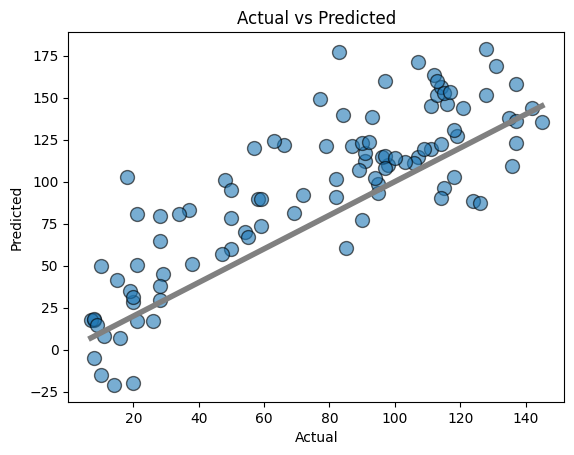

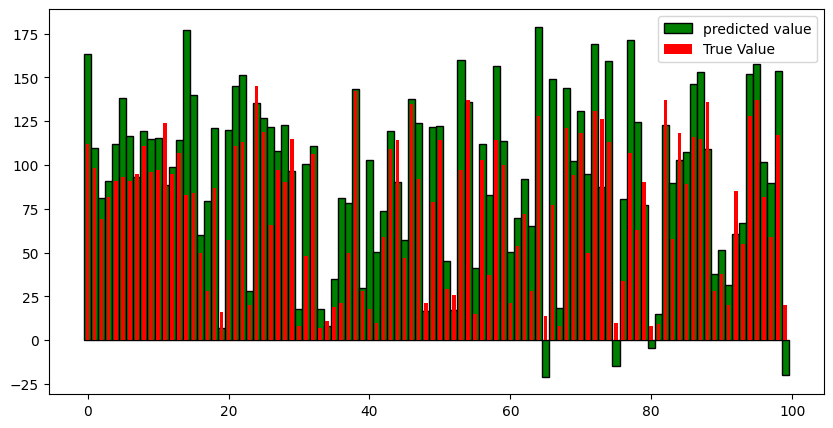

In [325]:
evaluation(y_test_clip, y_pred_lr)
plot_boundary(y_test_clip, y_pred_lr)

In [332]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)
X_pca.shape

(16504, 12)

In [317]:
xg1 = XGBRegressor()
xg1.fit(X_pca, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [318]:
y_pred_xg = xg1.predict(X_test_pca)
evaluation(y_test, y_pred_xg)

(100,) (100,)
Mean Squared Error: 1526.9860
Mean Absolute Error: 27.8140
Root Mean Squared Error: 39.0767
R-2 Score: 0.1157


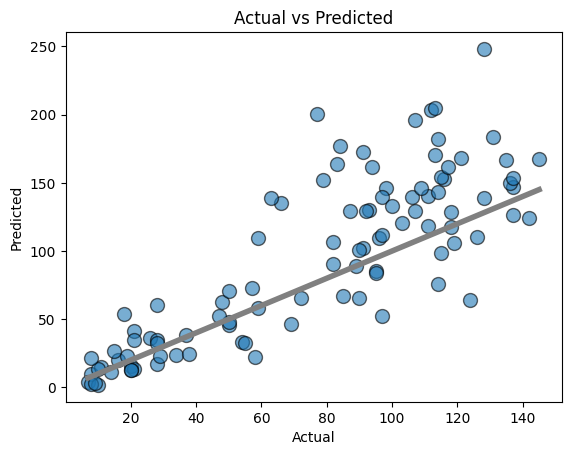

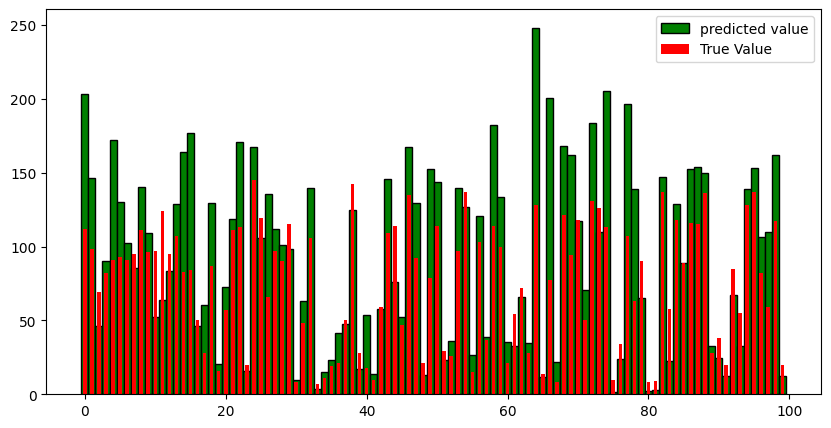

In [319]:
plot_boundary(y_test, y_pred_xg)

In [333]:
rf1 = RandomForestRegressor()
rf1.fit(X_pca, y_train)

RandomForestRegressor()

In [334]:
y_pred_rf = rf1.predict(X_test_pca)

In [335]:
evaluation(y_test, y_pred_rf)

(100,) (100,)
Mean Squared Error: 1507.4947
Mean Absolute Error: 27.7035
Root Mean Squared Error: 38.8265
R-2 Score: 0.1270


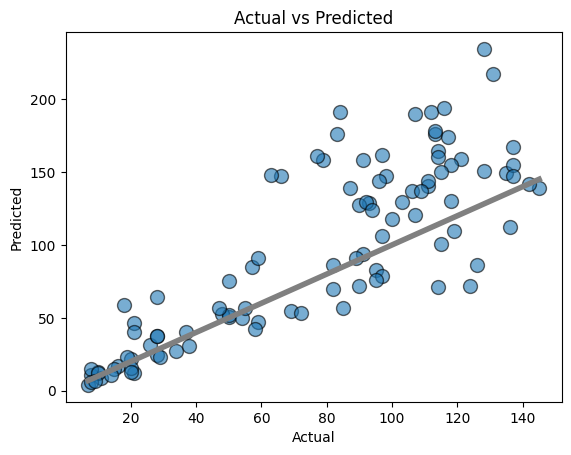

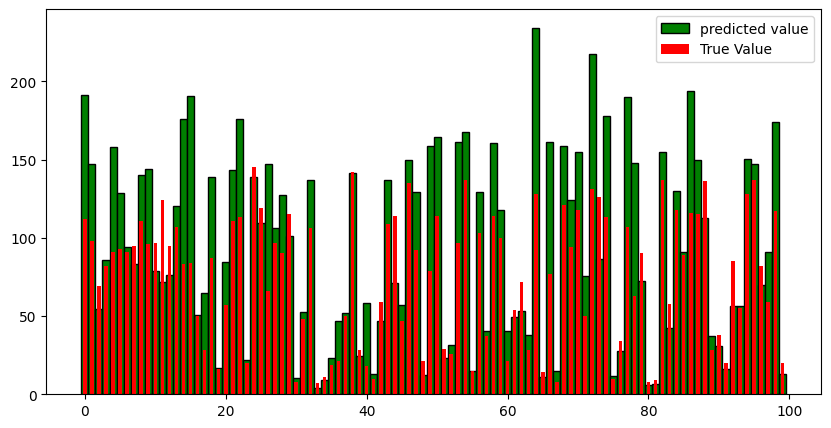

In [336]:
plot_boundary(y_test, y_pred_rf)

### make lstm

In [69]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [339]:
X_train_reshape = X_train_scale.reshape(X_train_scale.shape[0], 1, X_train_scale.shape[1])

In [340]:
X_val_reshape = X_val_scale.reshape(X_val_scale.shape[0], 1, X_val_scale.shape[1])
X_test_reshape = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [341]:
X_train_reshape.shape, X_val_reshape.shape, X_test_reshape.shape

((16504, 1, 47), (4127, 1, 47), (100, 1, 47))

In [380]:
y_test

0     112
1      98
2      69
3      82
4      91
     ... 
95    137
96     82
97     59
98    117
99     20
Name: RUL, Length: 100, dtype: int64

In [343]:
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape = (1, X_train_scale.shape[1])))
model.add(BatchNormalization())
model.add(LSTM(10, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [344]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1, 20)               │           5,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1, 20)               │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 10)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,617 (37.57 KB)

 Trainable params: 9,557 (37.33 KB)

 Non-trainable params: 60 (240.00 B)

In [347]:
model.compile(optimizer='Adam', loss='mse', metrics=['mse', 'r2_score'])

In [349]:
model.fit(X_train_reshape, y_train, epochs=20, batch_size=32, validation_data=(X_val_reshape, y_val))

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1796.3961 - mse: 1796.3961 - r2_score: 0.6167 - val_loss: 2570.9163 - val_mse: 2570.9163 - val_r2_score: 0.4778
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1794.2834 - mse: 1794.2834 - r2_score: 0.6227 - val_loss: 2555.3672 - val_mse: 2555.3672 - val_r2_score: 0.4809
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1731.8123 - mse: 1731.8123 - r2_score: 0.6247 - val_loss: 2747.0405 - val_mse: 2747.0405 - val_r2_score: 0.4420
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1720.0265 - mse: 1720.0265 - r2_score: 0.6301 - val_loss: 2543.1143 - val_mse: 2543.1143 - val_r2_score: 0.4834
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1801.8678 - mse: 1801.8678 - r2_score: 0.6197 - val_loss: 2189.5144 - val_mse: 2189.5144 - val_r2_score: 0.5553
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1771.0347 - mse: 1771.0347 - r2_score: 0.6244 - val_loss: 2587.3196 - val_mse: 2

In [350]:
y_model1 = model.predict(X_test_reshape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step


(100,) (100, 1)
Mean Squared Error: 906.4786
Mean Absolute Error: 22.2736
Root Mean Squared Error: 30.1078
R-2 Score: 0.4751


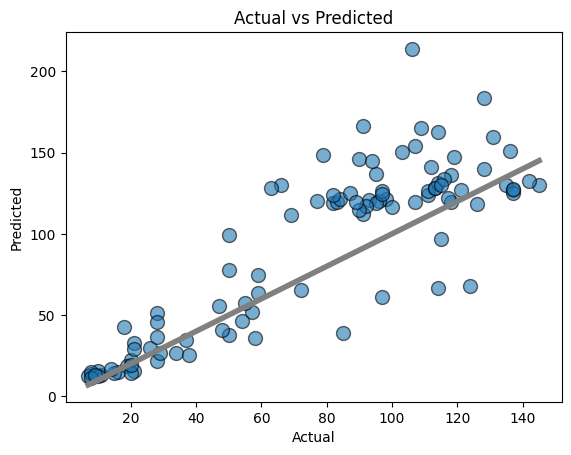

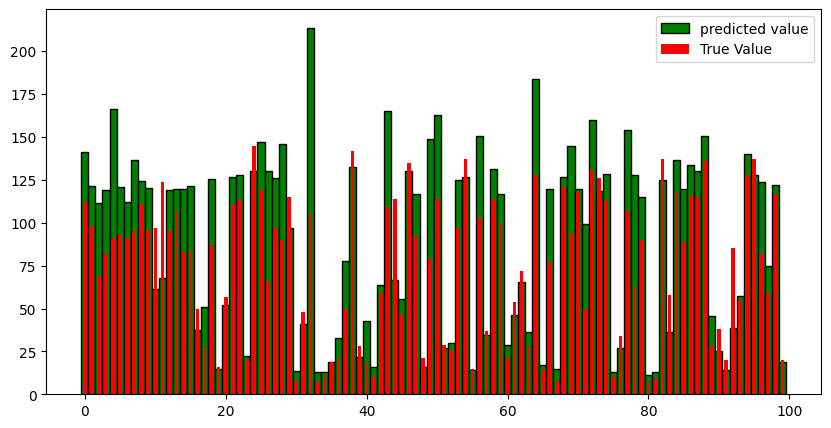

In [352]:
evaluation(y_test, y_model1)
plot_boundary(y_test, y_model1.reshape(100, ))

# Convert time-series into sequences (Sliding window approach).

In [55]:
df1.shape

(20631, 20)

In [56]:
rul= df1.rul
df1 = df1.drop(['rul'], axis = 1)
df1['rul'] = rul

In [57]:
df1.shape, df1.columns

((20631, 20),
 Index(['id', 'time', 'set1', 'set2', 'sensor2', 'sensor3', 'sensor4',
        'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
        'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
        'rul'],
       dtype='object'))

In [70]:
features = [
    'set1', 'set2', 'sensor2', 'sensor3', 'sensor4',
        'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
        'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21'
]
len(features)

17

In [71]:
remove = ['id', 'time', 'rul']

In [103]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1[features])

# Convert scaled values back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=features)

# Add 'id' and 'rul' columns back (for sequence generation)
df_scaled['id'] = df1['id']
df_scaled['rul'] = df1['rul']
df_scaled['time'] = df1['time']

In [104]:
df_scaled.shape

(20631, 20)

In [74]:
df_scaled.head()

,set1,set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,id,rul,time
0,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,1,191,1
1,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,1,190,2
2,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,1,189,3
3,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,1,188,4
4,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,1,187,5


In [76]:
features

['set1',
 'set2',
 'sensor2',
 'sensor3',
 'sensor4',
 'sensor6',
 'sensor7',
 'sensor8',
 'sensor9',
 'sensor11',
 'sensor12',
 'sensor13',
 'sensor14',
 'sensor15',
 'sensor17',
 'sensor20',
 'sensor21']

In [77]:
def create_sequences(data, features, window_size=10):
    X, y = [], []
    for unit_id in data['id'].unique():
        unit_data = data[data['id'] == unit_id][features].values
        unit_rul = data[data['id'] == unit_id]['rul'].values
        
        for i in range(len(unit_data) - window_size):
            X.append(unit_data[i : i + window_size])  
            y.append(unit_rul[i + window_size])  
    
    
    X = np.array(X)
    y = np.array(y)
    
    print("Shape of X:", X.shape)  
    print("Shape of y:", y.shape)  
    return X, y

In [78]:
X, y = create_sequences(df_scaled, features)

Shape of X: (19631, 10, 17)
Shape of y: (19631,)


In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [80]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_val.shape, y_val.shape)

Train shape: (15704, 10, 17) (15704,)
Test shape: (3927, 10, 17) (3927,)


In [81]:
# make model on above data
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape = (X.shape[1], X.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 100)             │          47,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 10, 100)             │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,301 (309.77 KB)

 Trainable params: 79,001 (308.60 KB)

 Non-trainable params: 300 (1.17 KB)

In [84]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [85]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 9409.9219 - mse: 9409.9219 - val_loss: 2856.2214 - val_mse: 2856.2214
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 1981.0808 - mse: 1981.0808 - val_loss: 2359.6880 - val_mse: 2359.6880
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 2273.6660 - mse: 2273.6660 - val_loss: 1621.1909 - val_mse: 1621.1909
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 1897.0815 - mse: 1897.0815 - val_loss: 1840.7615 - val_mse: 1840.7615
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 1865.5334 - mse: 1865.5334 - val_loss: 1497.4550 - val_mse: 1497.4550
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 1783.3450 - mse: 1783.3450 - val_loss: 2154.2046 - val_mse: 2154.2046
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 1780.1504 - mse: 1780.1504 - val_loss: 1461.9238 - val_mse: 1461.9238
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 1816.0765 - mse:

In [435]:
# make for train data

In [86]:
tem = test.loc[test.groupby("id")["time"].idxmax()]

In [87]:
tem

,id,time,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
30,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
79,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
205,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
311,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
409,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12545,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,522.30,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606
12679,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,521.58,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953
12800,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,521.53,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608
12897,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595


In [88]:
tem = tem[['id', 'time'] + features]

In [89]:
tem.shape

(100, 19)

In [90]:
scaled_data = scaler.transform(tem[features])

In [91]:
scaled_data.shape

(100, 17)

In [92]:
# Select relevant features
X_test = scaled_data # Extract feature values

# Repeat each row 10 times to create a sequence
X_test_seq = np.repeat(X_test[:, np.newaxis, :], 10, axis=1)  # Shape (100, 10, num_features)

In [93]:
y_test = RUL

In [94]:
X_test_seq.shape

(100, 10, 17)

In [162]:
X_test_seq

array([[[0.39259259, 0.9       , 0.36403509, ..., 0.42857143,
         0.54761905, 0.69831224],
        [0.39259259, 0.9       , 0.36403509, ..., 0.42857143,
         0.54761905, 0.69831224],
        [0.39259259, 0.9       , 0.36403509, ..., 0.42857143,
         0.54761905, 0.69831224],
        ...,
        [0.39259259, 0.9       , 0.36403509, ..., 0.42857143,
         0.54761905, 0.69831224],
        [0.39259259, 0.9       , 0.36403509, ..., 0.42857143,
         0.54761905, 0.69831224],
        [0.39259259, 0.9       , 0.36403509, ..., 0.42857143,
         0.54761905, 0.69831224]],

       [[0.57037037, 0.4       , 0.35087719, ..., 0.14285714,
         0.54761905, 0.50126582],
        [0.57037037, 0.4       , 0.35087719, ..., 0.14285714,
         0.54761905, 0.50126582],
        [0.57037037, 0.4       , 0.35087719, ..., 0.14285714,
         0.54761905, 0.50126582],
        ...,
        [0.57037037, 0.4       , 0.35087719, ..., 0.14285714,
         0.54761905, 0.50126582],
        [0.5

In [95]:
y_pred_model = model.predict(X_test_seq)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


In [102]:
evaluation(y_test, y_pred_model)

(100,) (100, 1)
Mean Squared Error: 747.2695
Mean Absolute Error: 20.5008
Root Mean Squared Error: 27.3362
R-2 Score: 0.5673


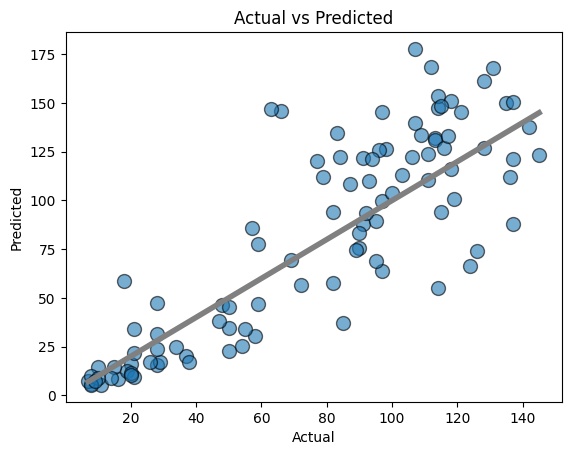

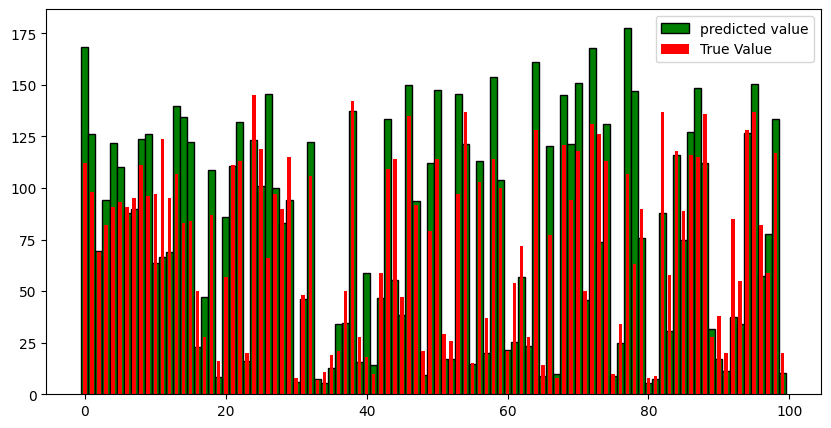

In [100]:
plot_boundary(y_test, y_pred_model.reshape(100,))

In [111]:
import pickle, joblib

In [110]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [112]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [113]:
import json 

In [115]:
with open('features.json', 'w') as f:
    f.write(json.dumps(features))

In [116]:
df1.head()

,id,time,set1,set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,rul
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


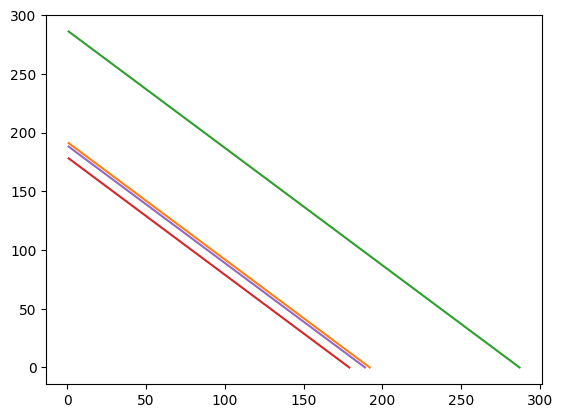

In [133]:
for i in range(5):
    plt.plot(df1[df1.id ==i].time, df1[df1.id ==i].rul)

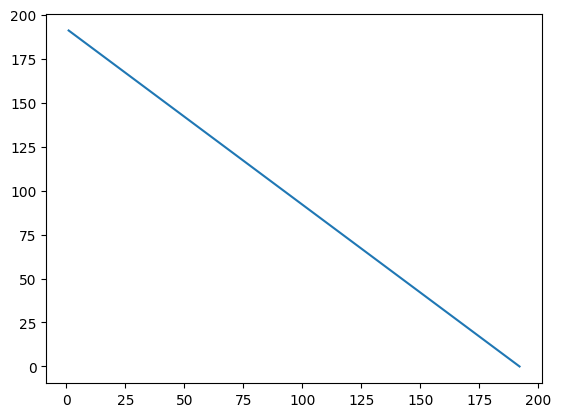

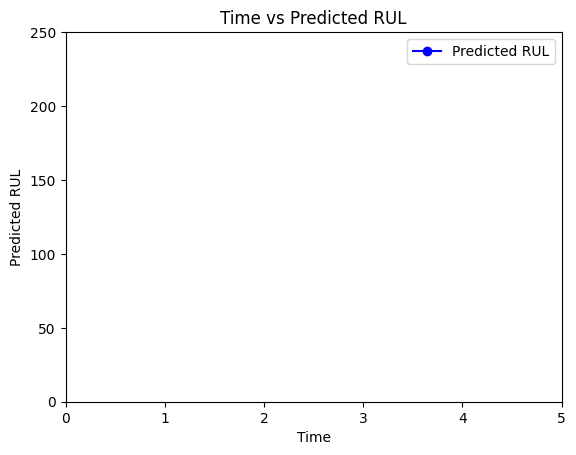

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Initialize empty lists to store time and predicted RUL values
time_points = []
predicted_rul = []

fig, ax = plt.subplots()
line, = ax.plot([], [], marker='o', linestyle='-', color='b', label='Predicted RUL')
ax.set_xlabel('Time')
ax.set_ylabel('Predicted RUL')
ax.set_title('Time vs Predicted RUL')
ax.legend()

# Initialization function for FuncAnimation
def init():
    ax.set_xlim(0, 5)       # Set initial x-axis limits
    ax.set_ylim(0, 250)     # Set initial y-axis limits
    return line,

# Update function for FuncAnimation
def update(frame):
    new_time = frame
    new_rul = np.random.randint(50, 200)  # Replace with your predicted RUL in practice
    time_points.append(new_time)
    predicted_rul.append(new_rul)
    
    line.set_data(time_points, predicted_rul)
    
    # Optionally, adjust limits dynamically:
    ax.relim()
    ax.autoscale_view()
    
    return line,

# Create an animation that calls the update function every 1000ms (1 second)
ani = FuncAnimation(fig, update, frames=range(1, 6), init_func=init, blit=True, interval=1000)

plt.show()


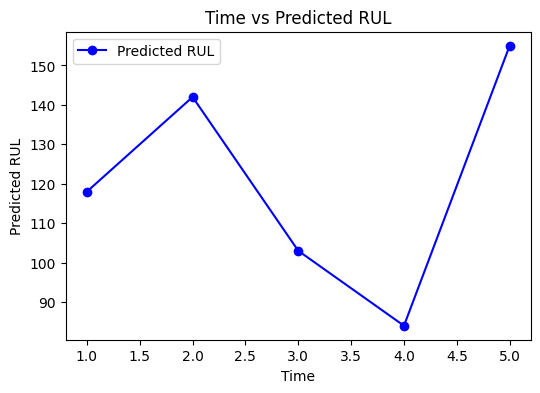

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

time_points = []
predicted_rul = []

# Simulate incoming data every 1 second
for new_time in range(1, 6):
    new_rul = np.random.randint(50, 200)  # Replace with your predicted RUL value
    time_points.append(new_time)
    predicted_rul.append(new_rul)
    
    clear_output(wait=True)  # Clear the previous output (works in Jupyter)
    plt.figure(figsize=(6,4))
    plt.plot(time_points, predicted_rul, marker='o', linestyle='-', color='b', label='Predicted RUL')
    plt.xlabel('Time')
    plt.ylabel('Predicted RUL')
    plt.title('Time vs Predicted RUL')
    plt.legend()
    plt.show()
    
    time.sleep(1)  # Wait 1 second before the next update
